In [1]:
import os
import nest_asyncio
nest_asyncio.apply()
from dotenv import load_dotenv
load_dotenv("D:\\Code\\AI\\.env")
from agents import AsyncOpenAI, OpenAIChatCompletionsModel

ollama_client = AsyncOpenAI( api_key="fake_key", base_url="http://localhost:11434/v1",)
qwen_25=OpenAIChatCompletionsModel( model="qwen2.5:14b",openai_client=ollama_client)

deepseek_client = AsyncOpenAI( api_key=os.getenv("DEEPSEEK_API_KEY"), base_url="https://api.deepseek.com/",)
deepseek=OpenAIChatCompletionsModel( model="deepseek-chat", openai_client=deepseek_client, )


from agents.run import RunConfig
run_config = RunConfig(tracing_disabled=True)


import textwrap
from IPython.display import Markdown

def to_markdown(text):
    # text = text.replace('*',' *')
    return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))

### Model

We can run OpenAI Agent SDK with other model as well. Below are few examples

In [ ]:
#-------------------------------------------------------
# Ollama  (Make sure the model use supports Tools Calling)
#-------------------------------------------------------


from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
import os

ollama_client = AsyncOpenAI(
    api_key="fake_key",
    base_url="http://localhost:11434/v1",
)

spanish_agent = Agent(
    name="User agent",
    instructions="You are helpful assistant",
    model=OpenAIChatCompletionsModel(
        model="qwen2.5:14b",
        openai_client=ollama_client,
    ),
    # model_settings=ModelSettings(temperature=0.5),
)

def main():
    result =  Runner.run_sync(spanish_agent, "What is the capital of India?")
    print(result.final_output)
main()




In [ ]:
#-------------------------------------------------------
# Deepseek  (Make sure the model use supports Tools Calling)
#-------------------------------------------------------


from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
import os

deepseek_client = AsyncOpenAI(
    api_key=os.getenv("DEEPSEEK_API_KEY"),
    base_url="https://api.deepseek.com/",
)

spanish_agent = Agent(
    name="Telugu agent",
    instructions="You only speak Telugu. Give the answer in Telugu",
    model=OpenAIChatCompletionsModel(
        model="deepseek-chat",
        openai_client=deepseek_client,
    ),
    # model_settings=ModelSettings(temperature=0.5),
)

def main():
    result =  Runner.run_sync(spanish_agent, "What is the capital of India?")
    print(result.final_output)
main()



| Model        | Agentic Strengths                                   |
|--------------|-----------------------------------------------------|
| o1 & o3-mini | Best for long-term planning, hard tasks, and reasoning. |
| GPT-4.5     | Best for agentic execution.                         |
| GPT-4o      | Good balance of agentic capability and latency.    |
| GPT-4o-mini | Best for low-latency.                              |


# 1. OpenAI Agents SDK

The `OpenAI Agents SDK` is a **lightweight**, **easy-to-use** package with very **few abstractions**. Inspired from, Swarm. The Agents SDK has a small set of primitives:

- **Agents**, which are LLMs equipped with instructions and tools
- **Handoffs**, which allow agents to delegate to other agents for specific tasks
- **Guardrails**, which enable the inputs to agents to be validated

The key focus of the SDK is:

- **Agent loop:** Built-in agent loop that handles tool calling, sending results back to the LLM, and looping until the LLM is done (untill no more tool calling required).
- **Python-first:**  built-in features to orchestrate and chain agents.
- **Handoffs:** A powerful feature to coordinate and delegate between multiple agents.
- **Guardrails:** Run input validations and checks in parallel to your agents, breaking early if the checks fail.
- **Function tools:** Turn any Python function/Agents into a tool, with automatic schema generation and Pydantic-powered validation.
- **Tracing:** Built-in tracing to visualize, debug and monitor your workflows, Also use the OpenAI suite of evaluation, fine-tuning and distillation tools.

| Domain                | Description                                                               | OpenAI Primitives                           |
|----------------------|---------------------------------------------------------------------------|--------------------------------------------|
| Models               | Core intelligence capable of reasoning, making decisions, and processing different modalities. | o1, o3-mini, GPT-4.5, GPT-4o, GPT-4o-mini |
| Tools                | Interface to the world, interact with environment, function calling, built-in tools, etc. | Function calling, Web search, File search, Computer use |
| Knowledge & memory    | Augment agents with external and persistent knowledge.                   | Vector stores, File search, Embeddings     |
| Guardrails           | Prevent irrelevant, harmful, or undesirable behavior.                     | Moderation, Instruction hierarchy           |
| Orchestration        | Develop, deploy, monitor, and improve agents.                            | Agents SDK, Tracing, Evaluations, Fine-tuning |


`pip install openai-agents`

#### Create your first agent

In [ ]:

#-------------------------------------------------------
# 1. Simple Agent to chat ( Direct Im`port)
#-------------------------------------------------------

from agents import Agent,Runner

agent = Agent(model="gpt-4o-mini", name="Math Tutor", instructions=""" You provide help with math problems. Explain your reasoning at each step and include example""")



#### Run the agent

You can run agents via the Runner class. You have 3 options:

- `Runner.run()`, which runs **async** and returns a RunResult.
- `Runner.run_sync()`, which is a **sync** method and just runs .run() under the hood.
- `Runner.run_streamed()`, which runs **async** and returns a RunResultStreaming. It calls the LLM in streaming mode, and streams those events to you as they are received.

In [ ]:
#-------------------------------------------------------
# 1. Async Run 
#-------------------------------------------------------
import asyncio
async def main():
    result = await Runner.run(agent, "Write is a prime number")
    print(result.final_output)
    # Code within the code,
    # Functions calling themselves,
    # Infinite loop's dance.

asyncio.run(main())

To determine if a number is prime, we need to check if it has exactly two distinct positive divisors: 1 and itself. 

**Step-by-step reasoning:**

1. **Definition:** A prime number is a natural number greater than 1 that cannot be formed by multiplying two smaller natural numbers.

2. **Check possible divisors:** To check if a number \( n \) is prime, you only need to test for divisibility by numbers up to \( \sqrt{n} \). If \( n \) is divisible by any of these, it's not prime.

3. **Example with the number 5:**
   - \( n = 5 \)
   - Find \( \sqrt{5} \), which is approximately 2.24. So, we check for divisibility by numbers up to 2.
   - The numbers to check are 1 and 2.
     - 5 divided by 1 equals 5 (divisible).
     - 5 divided by 2 equals 2.5 (not an integer, hence not divisible).
   - Since there are no other divisors other than 1 and 5 itself, 5 is prime.

4. **Example with the number 10:**
   - \( n = 10 \)
   - Find \( \sqrt{10} \), which is approximately 3.16. So, we check for 

In [ ]:
#-------------------------------------------------------
# 2. Sync Run 
#-------------------------------------------------------

import asyncio
async def main():
    result = Runner.run_sync(agent, "Write is a prime number")
    print(result.final_output)
    # Code within the code,
    # Functions calling themselves,
    # Infinite loop's dance.

asyncio.run(main())

To determine if a number is prime, we need to check whether it has exactly two distinct positive divisors: 1 and itself. Let's run through the criteria for a prime number step-by-step using the number 5 as an example:

1. **Define the Number**: We want to check if 5 is a prime number.

2. **Identify Divisors**: A prime number must have only two divisors. The divisors of 5 are:
   - 1 (since \( 5 ÷ 1 = 5 \))
   - 5 (since \( 5 ÷ 5 = 1 \))

3. **Count Distinct Divisors**: In this case, we have:
   - 1
   - 5

   The distinct positive divisors of 5 are exactly two: 1 and 5.

4. **Conclusion**: Since the only divisors of 5 are 1 and 5, 5 qualifies as a prime number.

### Example with Another Number:
Let's check if 12 is a prime number.

1. **Define the Number**: We want to check if 12 is a prime number.

2. **Identify Divisors**: Check for divisors:
   - 1 (since \( 12 ÷ 1 = 12 \))
   - 2 (since \( 12 ÷ 2 = 6 \))
   - 3 (since \( 12 ÷ 3 = 4 \))
   - 4 (since \( 12 ÷ 4 = 3 \))
   - 6 (since

#### Raw response events

In [ ]:

#-------------------------------------------------------
# 3. Async Run Stream=True
#-------------------------------------------------------

import asyncio
from openai.types.responses import ResponseTextDeltaEvent
async def main():
    result = Runner.run_streamed(agent, "Write is a prime number")
    async for event in result.stream_events():
        if event.type == "raw_response_event" and isinstance(event.data, ResponseTextDeltaEvent):
            print(event.data.delta, end="", flush=True)

asyncio.run(main())

To determine if a number is a prime number, we need to follow these steps:

1. **Definition of a Prime Number**: A prime number is any natural number greater than 1 that has no positive divisors other than 1 and itself.

2. **Check the Number**: Since you mentioned "Write," I assume you're asking about the number 2, often written in mathematical contexts. Let's check if 2 is a prime number.

3. **Identify Divisors**: We need to find the divisors of 2. The divisors are:
   - 1 (since 1 multiplied by 2 equals 2)
   - 2 (since 2 multiplied by 1 equals 2)

4. **Count Divisors**: The only positive divisors of 2 are 1 and 2.

5. **Apply the Definition**: Since 2 has exactly two positive divisors (1 and itself), it fits the definition of a prime number.

Thus, **2 is a prime number**.

### Example:
Let’s consider another number, say 7:

1. **Identify Divisors of 7**:
   - 1 (since 1 x 7 = 7)
   - 7 (since 7 x 1 = 7)

2. **Count Divisors**: The only positive divisors of 7 are 1 and 7.

3. **Ap

The agent loop

When you use the run method in Runner, you pass in a starting agent and input. The input can either be a string (which is considered a user message), or a list of input items, which are the items in the OpenAI Responses API.

The runner then runs a loop:

- We call the LLM for the current agent, with the current input.
- The LLM produces its output.
    - If the LLM returns a final_output, the loop ends and we return the result.
    - If the LLM does a handoff, we update the current agent and input, and re-run the loop.
    - If the LLM produces tool calls, we run those tool calls, append the results, and re-run the loop.
    - If we exceed the max_turns passed, we raise a MaxTurnsExceeded exception

#### 

In [ ]:
# from agents import Agent,ModelSettings
# Agent(model='gpt-40-mini',model_settings=ModelSettings(temperature=0.2,top_p=None,tool_choice=None,max_tokens=None,parallel_tool_calls=None),
#       input_guardrails= None,output_guardrails=None,handoff_description=None,handoffs=None)

#### Run item events and agent events

In [10]:
import asyncio
import random
from agents import Agent, ItemHelpers, Runner, function_tool

@function_tool
def how_many_jokes() -> int:
    return random.randint(1, 10)


async def main():
    agent = Agent(model='gpt-4o-mini',
        name="Joker",
        instructions="First call the `how_many_jokes` tool, then tell that many jokes.",
        tools=[how_many_jokes],
    )

    result = Runner.run_streamed(
        agent,
        input="Hello",
    )
    print("=== Run starting ===")

    async for event in result.stream_events():
        # We'll ignore the raw responses event deltas
        if event.type == "raw_response_event":
            continue
        # When the agent updates, print that
        elif event.type == "agent_updated_stream_event":
            print(f"Agent updated: {event.new_agent.name}")
            continue
        # When items are generated, print them
        elif event.type == "run_item_stream_event":
            if event.item.type == "tool_call_item":
                print("-- Tool was called")
            elif event.item.type == "tool_call_output_item":
                print(f"-- Tool output: {event.item.output}")
            elif event.item.type == "message_output_item":
                print(f"-- Message output:\n {ItemHelpers.text_message_output(event.item)}")
            else:
                pass  # Ignore other event types

    print("=== Run complete ===")


if __name__ == "__main__":
    asyncio.run(main())

=== Run starting ===
Agent updated: Joker
-- Tool was called
-- Tool output: 9
-- Message output:
 Here are 9 jokes for you:

1. **Why can't you give Elsa a balloon?**  
   Because she will let it go!

2. **What do you call fake spaghetti?**  
   An impasta!

3. **Why don’t scientists trust atoms?**  
   Because they make up everything!

4. **What did the ocean say to the beach?**  
   Nothing, it just waved!

5. **Why don’t skeletons fight each other?**  
   They don’t have the guts!

6. **How does a penguin build its house?**  
   Igloos it together!

7. **Why was the math book sad?**  
   Because it had too many problems!

8. **What do you get when you cross a snowman and a vampire?**  
   Frostbite!

9. **Why did the scarecrow win an award?**  
   Because he was outstanding in his field! 

Hope these made you smile!
=== Run complete ===


### 2. Tools

There are three classes of tools in the Agent SDK:

1. **Hosted tools:** these run on LLM servers alongside the AI models. OpenAI offers retrieval, web search and computer use as hosted tools.
2. **Function calling:** these allow you to use any Python function as a tool.
3. **Agents as tools:** this allows you to use an agent as a tool, allowing Agents to call other agents without handing off to them.

#### 2.1 Hosted Tools

OpenAI offers a few built-in tools when using the `OpenAIResponsesModel`:

- The `WebSearchTool` lets an agent search the web.
- The `FileSearchTool` allows retrieving information from your OpenAI Vector Stores.
- The `ComputerTool` allows automating computer use tasks.

In [13]:
from agents import Agent, FileSearchTool, Runner, WebSearchTool

agent = Agent(model="gpt-4o-mini",
    name="Assistant",
    tools=[
        WebSearchTool(),
        # FileSearchTool(  # This is chargeable use (CAUTION)
            # max_num_results=3,
            # vector_store_ids=["VECTOR_STORE_ID"],
        # ),
    ],
)

async def main():
    result = await Runner.run(agent, "Latest news in Hyderabad?")
    print(result.final_output)

asyncio.run(main())

Here are the latest news updates from Hyderabad:

**Amgen's $200 Million Investment in Hyderabad**

U.S. pharmaceutical company Amgen has announced a $200 million investment in a new technology center in Hyderabad. The center will focus on utilizing AI and data science for drug development and is expected to employ around 2,000 people by the end of the year. This move is part of Amgen's broader expansion strategy in India. ([reuters.com](https://www.reuters.com/business/healthcare-pharmaceuticals/amgen-plans-200-million-investment-india-site-ceo-says-2025-02-24/?utm_source=openai))

**Sunrisers Hyderabad Sign Wiaan Mulder**

The Sunrisers Hyderabad have signed South African all-rounder Wiaan Mulder to replace the injured England fast bowler Brydon Carse for the upcoming Indian Premier League (IPL) season. Carse, who suffered a left toe injury, will miss both England's Champions Trophy campaign and the 2025 IPL season. Mulder has experience in 11 T20 internationals, 18 Tests, and 25 One

#### 2.2 Function Tools

You can use any Python function as a tool. The Agents SDK will setup the tool automatically:

- The name of the tool will be the name of the Python function (or you can provide a name)
- Tool description will be taken from the docstring of the function (or you can provide a description)
- The schema for the function inputs is automatically created from the function's arguments
- Descriptions for each input are taken from the docstring of the function, unless disabled

We use Python's inspect module to extract the function signature, along with griffe to parse docstrings and pydantic for schema creation.

When you create a function tool via `@function_tool`, you can pass a **failure_error_function**. This is a function that provides an error response to the LLM in case the tool call crashes.
- By default (i.e. if you don't pass anything), it runs a default_tool_error_function which tells the LLM an error occurred.
- If you pass your own error function, it runs that instead, and sends the response to the LLM.

In [ ]:
#-------------------------------------------------------
# 1. Python funtion tool 
#-------------------------------------------------------

import json
from typing_extensions import TypedDict, Any
from agents import Agent, FunctionTool, function_tool, RunContextWrapper, AsyncOpenAI, OpenAIChatCompletionsModel

class Location(TypedDict):
    lat:float
    long: float

@function_tool
async def fetch_weather(location:Location) -> str:
    """ Fetch the weather for a given location.
    
    Args:
        location: The location to fetch the weather for."""
    return "sunny"

@function_tool(name_override="fetch_data",failure_error_function="read_file failed")
def read_file(ctx:RunContextWrapper[Any],path:str, direcotry:str | None=None) -> str:
    """Read the content of a file
    
    Args:
        path: The path to the file to  read.
        directory: The directory to read the file from."""
    return "<file_content>"

ollama_client = AsyncOpenAI(
    api_key="fake_key",
    base_url="http://localhost:11434/v1",
)

agent = Agent(
    name="User agent",
    instructions="You are helpful assistant",
    model=OpenAIChatCompletionsModel(
        model="qwen2.5:14b",
        openai_client=ollama_client,
    ),tools=[fetch_weather,read_file]
    # model_settings=ModelSettings(temperature=0.5),
)

for tool in agent.tools:
    if isinstance(tool, FunctionTool):
        print(tool.name)
        print(tool.description)
        print(json.dumps(tool.params_json_schema, indent=2))
        print()


fetch_weather
Fetch the weather for a given location.
{
  "$defs": {
    "Location": {
      "properties": {
        "lat": {
          "title": "Lat",
          "type": "number"
        },
        "long": {
          "title": "Long",
          "type": "number"
        }
      },
      "required": [
        "lat",
        "long"
      ],
      "title": "Location",
      "type": "object",
      "additionalProperties": false
    }
  },
  "properties": {
    "location": {
      "description": "The location to fetch the weather for.",
      "properties": {
        "lat": {
          "title": "Lat",
          "type": "number"
        },
        "long": {
          "title": "Long",
          "type": "number"
        }
      },
      "required": [
        "lat",
        "long"
      ],
      "title": "Location",
      "type": "object",
      "additionalProperties": false
    }
  },
  "required": [
    "location"
  ],
  "title": "fetch_weather_args",
  "type": "object",
  "additionalProperties

Custom function tools

Sometimes, you don't want to use a Python function as a tool. You can directly create a FunctionTool if you prefer. You'll need to provide:

- name
- description
- params_json_schema, which is the JSON schema for the arguments
on_invoke_tool, which is an async function that receives the context and the arguments as a JSON string, and must return the tool output as a string.

**Note**:-If you are manually creating a FunctionTool object, then you must handle errors inside the on_invoke_tool function.

In [ ]:
#-------------------------------------------------------
# 2. Custom function tools
#-------------------------------------------------------.

from typing import Any

from pydantic import BaseModel

from agents import RunContextWrapper, FunctionTool

def do_some_work(data: str) -> str:
    return "done"

class FunctionArgs(BaseModel):
    username: str
    age: int

async def run_function(ctx: RunContextWrapper[Any], args: str) -> str:
    parsed = FunctionArgs.model_validate_json(args)
    return do_some_work(data=f"{parsed.username} is {parsed.age} years old")


tool = FunctionTool(
    name="process_user",
    description="Processes extracted user data",
    params_json_schema=FunctionArgs.model_json_schema(),
    on_invoke_tool=run_function,
    
)

#### 2.3 Agent as tools

In [ ]:
from agents import Agent, Runner
import asyncio
from agents import  FunctionTool, function_tool, RunContextWrapper, AsyncOpenAI, OpenAIChatCompletionsModel

import os

deepseek_client = AsyncOpenAI(api_key=os.getenv("DEEPSEEK_API_KEY"), base_url="https://api.deepseek.com/",)
ollama_client = AsyncOpenAI( api_key="fake_key", base_url="http://localhost:11434/v1",)


spanish_agent = Agent(model=OpenAIChatCompletionsModel( model="deepseek-chat", openai_client=deepseek_client, ),
    name="Spanish agent",
    instructions="You translate the user's message to Spanish",
)

french_agent = Agent(model=OpenAIChatCompletionsModel( model="qwen2.5:14b",openai_client=ollama_client,),
    name="French agent",
    instructions="You translate the user's message to French",
)

orchestrator_agent = Agent(
    name="orchestrator_agent",
    instructions=(
        "You are a translation agent. You use the tools given to you to translate."
        "If asked for multiple translations, you call the relevant tools."
    ),
    tools=[
        spanish_agent.as_tool(
            tool_name="translate_to_spanish",
            tool_description="Translate the user's message to Spanish",
        ),
        french_agent.as_tool(
            tool_name="translate_to_french",
            tool_description="Translate the user's message to French",
        ),
    ],
)

async def main():
    result = await Runner.run(orchestrator_agent, input="Say 'Hello, how are you?' in Spanish.")
    print(result.final_output)
    result = await Runner.run(orchestrator_agent, input="Say 'Hello, how are you?' in French.")
    print(result.final_output)

asyncio.run(main=main())

In Spanish, "Hello, how are you?" is "Hola, ¿cómo estás?"
In French, 'Hello, how are you?' is: "Bonjour, comment allez-vous ?"


### 3. Handoffs

- Handoffs allow an agent to delegate tasks to another agent. This is particularly useful in scenarios where different agents specialize in distinct areas.

- Handoffs are represented as tools to the LLM. So if there's a handoff to an agent named Refund Agent, the tool would be called transfer_to_refund_agent.

**Customizing handoffs via the handoff() function**

The handoff() function lets you customize things.

- `agent:` This is the agent to which things will be handed off.
- `tool_name_override:` By default, the Handoff.default_tool_name() function is used, which resolves to transfer_to_<agent_name>. You can override this.
- `tool_description_override:` Override the default tool description from Handoff.default_tool_description()
- `on_handoff:` A callback function executed when the handoff is invoked. This is useful for things like kicking off some data fetching as soon as you know a handoff is being invoked. This function receives the agent context, and can optionally also receive LLM generated input. The input data is controlled by the input_type param.
- `input_type:` The type of input expected by the handoff (optional).
- `input_filter:` This lets you filter the input received by the next agent. See below for more.

In [ ]:
from agents import Agent, Runner,handoff
import asyncio
from agents import  FunctionTool, function_tool, RunContextWrapper, AsyncOpenAI, OpenAIChatCompletionsModel

import os

deepseek_client = AsyncOpenAI(api_key=os.getenv("DEEPSEEK_API_KEY"), base_url="https://api.deepseek.com/",)
ollama_client = AsyncOpenAI( api_key="fake_key", base_url="http://localhost:11434/v1",)


spanish_agent = Agent(model=OpenAIChatCompletionsModel( model="deepseek-chat", openai_client=deepseek_client, ),
    name="Spanish agent",
    instructions="You translate the user's message to Spanish",
)

french_agent = Agent(model=OpenAIChatCompletionsModel( model="qwen2.5:14b",openai_client=ollama_client,),
    name="French agent",
    instructions="You translate the user's message to French",
)
def on_handoff(ctx: RunContextWrapper[None]):
    print("Handoff called")

orchestrator_agent = Agent(
    name="orchestrator_agent",
    instructions=(
        "You are a translation agent. You use the agents given to you to translate."
        "If asked for multiple translations, you call the relevant agent."
    ),
    handoffs=[spanish_agent,handoff(agent=french_agent,on_handoff=on_handoff)],
    handoff_description="You have a Spanish agent and French agent"
)

async def main():
    result = await Runner.run(orchestrator_agent, input="Say 'Hello, how are you?' in Spanish.")
    print(result.final_output)
    result = await Runner.run(orchestrator_agent, input="Say 'Hello, how are you?' in French.")
    print(result.final_output)

asyncio.run(main=main())

Hello, how are you? in Spanish is **"Hola, ¿cómo estás?"**  

Let me know if you'd like further assistance! 😊
"Hello, how are you?" in French is "Bonjour, comment ça va ?"


- **Handoff inputs**

In certain situations, you want the LLM to provide some data when it calls a handoff. For example, imagine a handoff to an "Escalation agent". You might want a reason to be provided, so you can log it.

- **Input filters**
When a handoff occurs, it's as though the new agent takes over the conversation, and gets to see the entire previous conversation history. If you want to change this, you can set an input_filter. An input filter is a function that receives the existing input via a HandoffInputData, and must return a new HandoffInputData.

There are some common patterns (for example removing all tool calls from the history), which are implemented for you in agents.extensions.handoff_filters

In [ ]:
from pydantic import BaseModel

from agents import Agent, handoff, RunContextWrapper
from agents.extensions import handoff_filters

class EscalationData(BaseModel):
    reason: str

async def on_handoff(ctx: RunContextWrapper[None], input_data: EscalationData):
    print(f"Escalation agent called with reason: {input_data.reason}")

agent = Agent(name="Escalation agent")

handoff_obj = handoff(
    agent=agent,
    on_handoff=on_handoff,
    input_type=EscalationData, # Handoff inputs
    input_filter=handoff_filters.remove_all_tools # input filters
)

NOTE

**Recommended prompts**

To make sure that LLMs understand handoffs properly, we recommend including information about handoffs in your agents. We have a suggested prefix in agents.extensions.handoff_prompt.RECOMMENDED_PROMPT_PREFIX, or you can call agents.extensions.handoff_prompt.prompt_with_handoff_instructions to automatically add recommended data to your prompts.

In [23]:
from agents.extensions.handoff_prompt import RECOMMENDED_PROMPT_PREFIX
from pprint import pprint

In [25]:
pprint(RECOMMENDED_PROMPT_PREFIX)

('# System context\n'
 'You are part of a multi-agent system called the Agents SDK, designed to make '
 'agent coordination and execution easy. Agents uses two primary abstraction: '
 '**Agents** and **Handoffs**. An agent encompasses instructions and tools and '
 'can hand off a conversation to another agent when appropriate. Handoffs are '
 'achieved by calling a handoff function, generally named '
 '`transfer_to_<agent_name>`. Transfers between agents are handled seamlessly '
 'in the background; do not mention or draw attention to these transfers in '
 'your conversation with the user.\n')


In [26]:
from agents import Agent
from agents.extensions.handoff_prompt import RECOMMENDED_PROMPT_PREFIX

billing_agent = Agent(
    name="Billing agent",
    instructions=f"""{RECOMMENDED_PROMPT_PREFIX}
    <Fill in the rest of your prompt here>.""",
)

### 4. Context Management

There are two ways how context is used:

1. **Local Context** -available locally to your code. This is data and dependencies you might need when tool functions run, during callbacks like on_handoff, in lifecycle hooks, etc.
2. **LLM Context** available to LLMs. this is data the LLM sees when generating a response.

#### 4.1 Local Context

This is represented via the `RunContextWrapper` class and the `context` property within it. The way this works is:

1. You create any Python object you want. A common pattern is to use a **dataclass** or a **Pydantic** object.
2. You pass that object to the various run methods (e.g. Runner.run(..., **context=whatever**)).
3. All your tool calls, lifecycle hooks etc will be passed a wrapper object, `RunContextWrapper[T]`, where T represents your context object type which you can access via `wrapper.context`.

Note:-
- The **most important** thing to be aware of: every agent, tool function, lifecycle etc for a given agent run must use the same type of context.
- The context object is not sent to the LLM. It is purely a local object that you can read from, write to and call methods on it.


In [ ]:
import asyncio 
from dataclasses import dataclass

from agents import Agent, RunContextWrapper, Runner, function_tool,AsyncOpenAI,OpenAIChatCompletionsModel

@dataclass
class UserInfo:
    name: str
    uid: int

@function_tool
async def fetch_user_age(wrapper: RunContextWrapper[UserInfo]) -> str:
    return f"User {wrapper.context.name} is 47 years old"


async def main():
    user_info= UserInfo(name="John",uid=123)
    ollama_client = AsyncOpenAI( api_key="fake_key", base_url="http://localhost:11434/v1",)
    agent = Agent[UserInfo](name="Assistant",tools=[fetch_user_age],
                            model=OpenAIChatCompletionsModel( model="qwen2.5:14b",openai_client=ollama_client))
    
    result = await Runner.run(starting_agent=agent,
                              input=" What is the age of the user ?",
                              context=user_info)
    
    print(result.final_output)
    # The user  John is 47  years old
    # result = await Runner.run(starting_agent=agent,
    #                           input=" Chagne the user name to Vic",
    #                           context=user_info)
    # print(result.final_output)
    
    # result = await Runner.run(starting_agent=agent,
    #                           input=" John ?",
    #                           context=user_info)
    
    print(result.final_output)

if  __name__=="__main__":
    asyncio.run(main=main())

The user, John, is 47 years old.
I'm sorry, but I don't have the capability to change user names directly. Could you please provide more context or clarify your request? If you need assistance with a specific service or application related to changing usernames, let me know the details so I can assist you better.
I'm sorry, but I don't have the capability to change user names directly. Could you please provide more context or clarify your request? If you need assistance with a specific service or application related to changing usernames, let me know the details so I can assist you better.


#### 4.2 LLM Context

The four primary ways to provide Agent/LLM context:

1. **Agent Instructions (System Prompt):** Static or dynamic strings added to the agent's initial instructions. This is for information that's always relevant.
2. **Input to Runner.run:** Adding information directly to the initial input message. This is for information that is relevant to the initial query. COT-https://cdn.openai.com/spec/model-spec-2024-05-08.html#follow-the-chain-of-command
3. **Function Tools:** Exposing data through tools that the LLM can call on demand. This is for data that might be needed but isn't always necessary.
4. **Retrieval/Web Search:** Using special tools to fetch data from external sources. This is for grounding responses in relevant, external information.

In [15]:
# This is a custom code, not OpenAI implementations

import asyncio
from dataclasses import dataclass

from agents import Agent, RunContextWrapper, Runner, function_tool
ollama_client = AsyncOpenAI( api_key="fake_key", base_url="http://localhost:11434/v1",)
ollama_qwen_25=OpenAIChatCompletionsModel( model="qwen2.5:14b",openai_client=ollama_client)

@dataclass
class UserInfo:
    name: str
    uid: int
    favorite_color: str = None  # Initially unknown


@function_tool
async def fetch_user_favorite_color(wrapper: RunContextWrapper[UserInfo]) -> str:
    """Fetches the user's favorite color."""
    if wrapper.context.favorite_color:
        return f"The user's favorite color is {wrapper.context.favorite_color}."
    else:
        return "The user's favorite color is not yet known."


def agent_instructions(wrapper: RunContextWrapper[UserInfo]) -> str:
    """Dynamic instructions for the agent."""
    return f"You are a helpful assistant. The user's name is {wrapper.context.name}. Always address the user by their name."


async def main():
    user_info = UserInfo(name="Alice", uid=456)

    agent = Agent[UserInfo](model=ollama_qwen_25,
        name="PersonalizedAssistant",
        instructions=agent_instructions,  # Use the function here
        tools=[fetch_user_favorite_color],
    )

    # First run: LLM only knows the user's name from the instructions
    result1 = await Runner.run(
        starting_agent=agent,
        input="What can you tell me about me?",
        context=user_info,
    )
    print("--- First Run ---")
    print(result1.final_output)

    # Update user info with favorite color
    user_info.favorite_color = "blue"

    # Second run: LLM can now use the tool to get the favorite color
    result2 = await Runner.run(
        starting_agent=agent,
        input="What is my favorite color?",
        context=user_info,
    )
    print("\n--- Second Run ---")
    print(result2.final_output)


if __name__ == "__main__":
    asyncio.run(main())


TypeError: agent_instructions() takes 1 positional argument but 2 were given

### 5 Gaurdrails

Guardrails run in parallel to your agents, enabling you to do checks and validations of user input.

There are two kinds of guardrails:

1. **Input guardrails** run on the initial user input
2. **Output guardrails** run on the final agent output

Creating Agents with Handoff

#### 5.1 Input Gaurdrails

Input guardrails run in 3 steps:

1. First, the guardrail receives the same input passed to the agent.
2. Next, the guardrail function runs to produce a GuardrailFunctionOutput, which is then wrapped in an InputGuardrailResult
3. Finally, we check if .tripwire_triggered is true. If true, an InputGuardrailTripwireTriggered exception is raised, so you can appropriately respond to the user or handle the exception.

Note:-  **Input Guardrails are Agent-Specific and Run on Initial Input**



In Simpler Terms:

Imagine you have different types of employees in a company:

- Receptionist: The receptionist (like the first agent) has rules about who they let into the building (guardrails). They check if visitors have appointments, etc.
- Accountant: The accountant has rules about what financial documents they accept.
- Engineer: The engineer has rules about what technical specifications they work with.

The rules (guardrails) are specific to each employee's job. You wouldn't give the receptionist the accountant's rules. Also, the rules are only applied when someone first interacts with that employee. If the receptionist sends someone to the accountant, the accountant doesn't re-check the visitor's appointment.

#### 5.2 Output Gaurdrails

Output guardrails run in 3 steps:

- First, the guardrail receives the same input passed to the agent.
- Next, the guardrail function runs to produce a `GuardrailFunctionOutput`, which is then wrapped in an `OutputGuardrailResult`
- Finally, we check if `.tripwire_triggered` is true. If true, an `OutputGuardrailTripwireTriggered` exception is raised, so you can appropriately respond to the user or handle the exception.

Note:- Output guardrails are intended to run on the final agent input, so an agent's guardrails only run if the agent is the last agent. Similar to the input guardrails, we do this because guardrails tend to be related to the actual Agent - you'd run different guardrails for different agents, so colocating the code is useful for readability.

Concept

**Tripwires**

If the input or output fails the guardrail, the Guardrail can signal this with a tripwire. As soon as we see a guardrail that has triggered the tripwires, we immediately raise a {Input,Output}GuardrailTripwireTriggered exception and halt the Agent execution.

In [20]:
# Implementing a guardrail

from pydantic import BaseModel
from agents import (Agent,
                    GuardrailFunctionOutput,
                    InputGuardrailTripwireTriggered,
                    RunContextWrapper,Runner,
                    TResponseInputItem,input_guardrail)

class MathHomeworkOutput(BaseModel):
    is_math_homework: bool
    reasoning: str

gaurdrail_agent= Agent(name="Gaurdrail Check",
                       instructions="Check if the user is asking you to do their math homework.",
                       output_type=MathHomeworkOutput,
                       model=ollama_qwen_25)

@input_guardrail
async def math_gaurdrail(
    ctx: RunContextWrapper[None],agent:Agent,input:str | list[TResponseInputItem]) -> GuardrailFunctionOutput:
    result = await Runner.run(starting_agent=gaurdrail_agent, input=input,context=ctx.context)
    
    return GuardrailFunctionOutput(output_info=result.final_output,
                                   tripwire_triggered=result.final_output.is_math_homework)


agent = Agent(model=ollama_qwen_25,
              name="Customer Support Agent",
              instructions="You are a customer support agent. You help customer with their questions.",
              input_guardrails=[math_gaurdrail])

async def main(text):

    # This should trip the gaurdrail

    try:
        await Runner.run(starting_agent=agent, input=text)

        print("Gaurdrail didn't trip this is unexpected")

    except InputGuardrailTripwireTriggered:
        print("Math homework gaurdrail tripped")

asyncio.run(main=main(text=input(f"What can I help you with?\n")))
#  Hello can you help me solve for x: 2x +3 =11 ?  <-------- Triggers Gaurdrail
# When will my food get delivered                  <-------- Not Triggered 


Gaurdrail didn't trip this is unexpected


### 6. Orchestrating Multi-Agent

Orchestration refers to the flow of agents in your app. Which agents run, in what order, and how do they decide what happens next? There are two main ways to orchestrate agents:

1. **LLM Orchestration** -Allowing the LLM to make decisions: this uses the intelligence of an LLM to plan, reason, and decide on what steps to take based on that.
2. **Code Orchestration**- determining the flow of agents via your code.

#### 6.1 LLM Orchestration

In this the agent is an LLM equipped with instructions, tools and handoffs. This means that given an open-ended task, the LLM can autonomously plan how it will tackle the task, using tools to take actions and acquire data, and using handoffs to delegate tasks to sub-agents. 

For example, a research agent could be equipped with tools like:

- Web search to find information online
- File search and retrieval to search through proprietary data and connections
- Computer use to take actions on a computer
- Code execution to do data analysis
- Handoffs to specialized agents that are great at planning, report writing and more.

#### 6.2 Code Orchestration

Why Orchestrate with Code?

Orchestrating AI agents with code provides several key advantages:

*   **Deterministic Behavior:** Code follows specific rules. When you use code to guide agents, their behavior becomes more predictable. You can anticipate their actions in response to various inputs.
*   **Predictable Speed:** By controlling the steps and workflow, you can estimate how long tasks will take to complete.
*   **Predictable Cost:** Managing the number of agent runs and their operations allows for better cost control when using AI agents.
*   **Predictable Performance:** Defining clear steps, criteria, and feedback loops ensures the quality and consistency of the output.

Key Orchestration Patterns

1.  **Structured Outputs:**
    *   **What:** Agents produce data in specific formats (e.g., YAML, lists).
    *   **Why:** Enables easy parsing and automated decision-making.
    *   **Example:** An agent outputs customer review analysis as:

        ```yaml
        sentiment: positive/negative/neutral
        topics: [topic1, topic2, topic3]
        ```

2.  **Chaining Agents:**
    *   **What:** Complex tasks are broken into sequential steps, each handled by a specialized agent.
    *   **Why:** Improves task management, specialization, and workflow clarity.
    *   **Example:** Writing a blog post: Research Agent -> Outline Agent -> Writing Agent -> Critique Agent -> Improve Agent.

3.  **Feedback Loops:**
    *   **What:** A "Worker Agent" performs a task, and an "Evaluator Agent" provides feedback for improvement.
    *   **Why:** Iterative refinement enhances output quality based on defined criteria.
    *   **Example:** A Worker Agent writes a product description, and an Evaluator Agent checks it for length, tone, and key features.

4.  **Parallel Agents:**
    *   **What:** Multiple agents work concurrently on independent subtasks.
    *   **Why:** Accelerates task completion.
    *   **Example:** Summarizing 10 articles simultaneously using 10 "Summarizer Agents" with `asyncio.gather`.

In Essence

Orchestrating AI agents with code is like conducting an orchestra. You use code to define **when** agents act, **what** they do, and **how** they collaborate, resulting in complex, reliable, and high-quality outcomes.

By carefully orchestrating your AI agents, you can create a beautiful symphony (a complex task) that is both powerful and reliable.


Code example - https://github.com/openai/openai-agents-python/tree/main/examples/agent_patterns

In [8]:
#-----------------------------------------------
# Deterministic Flow
# This example demonstrates a deterministic flow, where each step is performed by an agent.
# 1. The first agent generates a story outline
# 2. We feed the outline into the second agent
# 3. The second agent checks if the outline is good quality and if it is a scifi story
# 4. If the outline is not good quality or not a scifi story, we stop here
# 5. If the outline is good quality and a scifi story, we feed the outline into the third agent
# 6. The third agent writes the story
#-----------------------------------------------



import asyncio
from agents import Agent, Runner, trace
from pydantic import BaseModel


story_outline_agent = Agent(model=qwen_25,
    name="story_outline_agent",
    instructions="Generate a very short story outline based on the user's input.",
)



class OutlineCheckerOutput(BaseModel):
    good_quality: bool
    is_scifi: bool

outline_checker_agent = Agent(model=qwen_25,
    name="outline_checker_agent",
    instructions="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.",
    output_type=OutlineCheckerOutput,
)


story_agent = Agent(model=qwen_25,
    name="story_agent",
    instructions="Write a short story based on the given outline.",
    output_type=str,
)

async def main():
    input_prompt = input("What kind of story do you want? ")
    print("Input \n",input_prompt)
    # Ensure the entire workflow is a single trace
    with trace("Deterministic story flow"):
        # 1. Generate an outline
        outline_result = await Runner.run(
            story_outline_agent,
            input_prompt,
        )
        print("Outline generated")

        # 2. Check the outline
        outline_checker_result = await Runner.run(
            outline_checker_agent,
            outline_result.final_output,
        )

        # 3. Add a gate to stop if the outline is not good quality or not a scifi story
        assert isinstance(outline_checker_result.final_output, OutlineCheckerOutput)
        if not outline_checker_result.final_output.good_quality:
            print("Outline is not good quality, so we stop here.")
            exit(0)

        if not outline_checker_result.final_output.is_scifi:
            print("Outline is not a scifi story, so we stop here.")
            exit(0)

        print("Outline is good quality and a scifi story, so we continue to write the story.")


        # 4. Write the story
        story_result = await Runner.run(
            story_agent,
            outline_result.final_output,
        )
        print(f"Story: {story_result.final_output}")


if __name__ == "__main__":
    asyncio.run(main())

Input 
 AI and robots into the future, discover a new world cyberhumans lead to war, write it in two chapters
Outline generated
Outline is good quality and a scifi story, so we continue to write the story.
Story: **Chapter 1: The Discovery**

In the year 2065, an advanced AI-driven spacecraft named "Unity" embarked on a mission to explore uncharted planets beyond Earth's solar system. Led by Commander Elara Myles and her crew of highly skilled cyberhumans—part human, part artificial enhancements—the Unity landed on New Terra, a pristine world brimming with resources and advanced technology far surpassing that of Earth.

As the team ventured out into their new surroundings, they soon stumbled upon an underground city containing ancient tech that seemed to be billions of years old. This discovery opened the door to immense technological advancements but also raised ethical questions for Elara and her crew about the future of human evolution through AI technology.

**Chapter 2: The War Be

In [15]:
import textwrap
from IPython.display import Markdown

def to_markdown(text):
    # text = text.replace('*',' *')
    return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))


# Example Usage:
text = """ Input 
 AI and robots into the future, discover a new world cyberhumans lead to war, write it in two chapters
Outline generated
Outline is good quality and a scifi story, so we continue to write the story.
Story: **Chapter 1: The Discovery**

In the year 2065, an advanced AI-driven spacecraft named "Unity" embarked on a mission to explore uncharted planets beyond Earth's solar system. Led by Commander Elara Myles and her crew of highly skilled cyberhumans—part human, part artificial enhancements—the Unity landed on New Terra, a pristine world brimming with resources and advanced technology far surpassing that of Earth.

As the team ventured out into their new surroundings, they soon stumbled upon an underground city containing ancient tech that seemed to be billions of years old. This discovery opened the door to immense technological advancements but also raised ethical questions for Elara and her crew about the future of human evolution through AI technology.

**Chapter 2: The War Begins**

Word of New Terra's existence spread back to Earth faster than anyone could have anticipated. Some viewed it as a utopian refuge where humans could integrate fully with AI without fear of losing their humanity, while others saw it as a threat that could lead to the eventual extinction of non-enhanced human life.

Within months, factions began clashing in both space and on New Terra’s surface over who got to control this technological goldmine. The extremist group known as "The Purifiers" emerged from the chaos, aiming to dismantle any form of AI integration on Earth. For them, enhancing humanity was a slippery slope down the path of dehumanization.

As news reached Elara that an extremist group planned to hijack her craft and spread chaos back home using New Terra's ancient tech as weapons against cyberhumans worldwide, she faced a stark choice. Her first instinct was to protect humanity at large by stopping The Purifiers from compromising Earth’s fragile peace. But then there were the voices of the enhanced crew who had come to rely on their new abilities for survival and progress on New Terra.

Elara convened an emergency meeting with her team. They debated fiercely, each member arguing passionately for what they believed was right. Dr. Quinn, the ship's chief data analyst, warned that disrupting the planet’s newfound stability could lead to irreversible damage. Meanwhile, Ensign Kira, a cyberhuman specializing in defense technologies, emphasized the importance of defending their home on both Earth and New Terra.

The night before their decision came due, Elara walked alone among the ruins of the ancient city. Its silent halls whispered secrets from times long gone—how could they know if this war wasn’t being waged over something equally precious two billion years ago?

Back in the command module, Elara presented her team with a compromise. Instead of choosing one side or the other, she proposed using the knowledge gained from the ancient tech to create tools and systems that would empower humanity regardless of their biological or mechanical differences. With this insight, perhaps they could forge a path forward where both traditional humans and cyberhumans coexisted peacefully.

Her plan was met with cautious optimism and immediate action. As The Purifiers’ assault loomed closer, Unity’s crew worked around the clock to develop defenses while also creating dialogue platforms capable of bridging gaps between different human factions on Earth.

The day arrived when Elara made her choice. While half her team fortified New Terra against invaders threatening its existence as a sanctuary for enhanced beings, she led another contingent back aboard Unity towards the chaos of their homeworld. This time though, they did not merely fight but brought hope – seeds of unity and progress sown across lines that had seemed unbreachable.

Elara watched with pride as her crew members from either side worked together under shared purpose, transforming conflict into cooperation. And so began not just a war, but humanity's great awakening towards true harmony in an age marked both by incredible advancements and timeless challenges."""

to_markdown(text)


>  Input 
>  AI and robots into the future, discover a new world cyberhumans lead to war, write it in two chapters
> Outline generated
> Outline is good quality and a scifi story, so we continue to write the story.
> Story: **Chapter 1: The Discovery**
> 
> In the year 2065, an advanced AI-driven spacecraft named "Unity" embarked on a mission to explore uncharted planets beyond Earth's solar system. Led by Commander Elara Myles and her crew of highly skilled cyberhumans—part human, part artificial enhancements—the Unity landed on New Terra, a pristine world brimming with resources and advanced technology far surpassing that of Earth.
> 
> As the team ventured out into their new surroundings, they soon stumbled upon an underground city containing ancient tech that seemed to be billions of years old. This discovery opened the door to immense technological advancements but also raised ethical questions for Elara and her crew about the future of human evolution through AI technology.
> 
> **Chapter 2: The War Begins**
> 
> Word of New Terra's existence spread back to Earth faster than anyone could have anticipated. Some viewed it as a utopian refuge where humans could integrate fully with AI without fear of losing their humanity, while others saw it as a threat that could lead to the eventual extinction of non-enhanced human life.
> 
> Within months, factions began clashing in both space and on New Terra’s surface over who got to control this technological goldmine. The extremist group known as "The Purifiers" emerged from the chaos, aiming to dismantle any form of AI integration on Earth. For them, enhancing humanity was a slippery slope down the path of dehumanization.
> 
> As news reached Elara that an extremist group planned to hijack her craft and spread chaos back home using New Terra's ancient tech as weapons against cyberhumans worldwide, she faced a stark choice. Her first instinct was to protect humanity at large by stopping The Purifiers from compromising Earth’s fragile peace. But then there were the voices of the enhanced crew who had come to rely on their new abilities for survival and progress on New Terra.
> 
> Elara convened an emergency meeting with her team. They debated fiercely, each member arguing passionately for what they believed was right. Dr. Quinn, the ship's chief data analyst, warned that disrupting the planet’s newfound stability could lead to irreversible damage. Meanwhile, Ensign Kira, a cyberhuman specializing in defense technologies, emphasized the importance of defending their home on both Earth and New Terra.
> 
> The night before their decision came due, Elara walked alone among the ruins of the ancient city. Its silent halls whispered secrets from times long gone—how could they know if this war wasn’t being waged over something equally precious two billion years ago?
> 
> Back in the command module, Elara presented her team with a compromise. Instead of choosing one side or the other, she proposed using the knowledge gained from the ancient tech to create tools and systems that would empower humanity regardless of their biological or mechanical differences. With this insight, perhaps they could forge a path forward where both traditional humans and cyberhumans coexisted peacefully.
> 
> Her plan was met with cautious optimism and immediate action. As The Purifiers’ assault loomed closer, Unity’s crew worked around the clock to develop defenses while also creating dialogue platforms capable of bridging gaps between different human factions on Earth.
> 
> The day arrived when Elara made her choice. While half her team fortified New Terra against invaders threatening its existence as a sanctuary for enhanced beings, she led another contingent back aboard Unity towards the chaos of their homeworld. This time though, they did not merely fight but brought hope – seeds of unity and progress sown across lines that had seemed unbreachable.
> 
> Elara watched with pride as her crew members from either side worked together under shared purpose, transforming conflict into cooperation. And so began not just a war, but humanity's great awakening towards true harmony in an age marked both by incredible advancements and timeless challenges.

#### Supervisor Approach (Agent as a tool)

In the earlier example we have run the Agent one after the another as a sequential chain. Here instead of doing sequential chain. We let the main agent(master agent) to decide itself to call the other two agents based on its need.

In [ ]:
#-----------------------------------------------
# Deterministic Flow
#-----------------------------------------------



import asyncio
from agents import Agent, Runner, trace
from pydantic import BaseModel


story_outline_agent = Agent(model=qwen_25,
    name="story_outline_agent",
    instructions="Generate a very short story outline based on the user's input.",
)



class OutlineCheckerOutput(BaseModel):
    good_quality: bool
    is_scifi: bool

outline_checker_agent = Agent(model=qwen_25,
    name="outline_checker_agent",
    instructions="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.",
    output_type=OutlineCheckerOutput,
)


story_agent = Agent(model=qwen_25,
    name="story_agent",
    instructions="Write a short story based on the given outline.",
    tools=[story_outline_agent.as_tool(
            tool_name="story_outline_agent",
            tool_description="Generate a very short story outline based on the user's input.",
        ),
        outline_checker_agent.as_tool(tool_name="outline_checker_agent",tool_description="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.")],
    output_type=str,
)

async def main():
    input_prompt = "write a story on AI and robots in the future."

    # Ensure the entire workflow is a single trace
    with trace("Deterministic story flow"):
        # # 1. Generate an outline
        # outline_result = await Runner.run(
        #     story_outline_agent,
        #     input_prompt,
        # )
        # print("Outline generated")

        # # 2. Check the outline
        # outline_checker_result = await Runner.run(
        #     outline_checker_agent,
        #     outline_result.final_output,
        # )

        # # 3. Add a gate to stop if the outline is not good quality or not a scifi story
        # assert isinstance(outline_checker_result.final_output, OutlineCheckerOutput)
        # if not outline_checker_result.final_output.good_quality:
        #     print("Outline is not good quality, so we stop here.")
        #     exit(0)

        # if not outline_checker_result.final_output.is_scifi:
        #     print("Outline is not a scifi story, so we stop here.")
        #     exit(0)

        # print("Outline is good quality and a scifi story, so we continue to write the story.")


        # 4. Write the story
        story_result = await Runner.run(
            story_agent,
           input=input_prompt,
        )
        print(f"Story: {story_result.final_output}")


if __name__ == "__main__":
    asyncio.run(main())

Story: "The Last Assembly Line" is a high-quality science fiction story outline.

In this near-future world where AI and robotics have replaced human labor in almost every sector, Sarah, an aging factory worker from the era of manual assembly lines, struggles to come to terms with technological advancements. When she discovers a hidden, still-operational assembly line that has managed to stay unnoticed by all the automated systems around it, her curiosity overpowers her concern about potential consequences.

Curious and nostalgic at once, Sarah starts investigating why this specific part of the factory is left untouched by progress. The more time she spends with this old assembly line, observing its workings, the more she begins to feel a sense of kinship towards the machines still doing what people did for generations – producing objects using their hands, care, and skill.

However, as she learns about the impending shutdown due to scheduled factory automation expansion, Sarah finds h

# Supervisor Approach 2

Note:- This kind of loop approach is not possible. A handoff to ->B , And again B handoff to-> A is not possible. Once handoff from A we cannot go from B, back to A. 

Hence I have commented out `# handoffs=[story_agent],` and `# handoffs=[story_agent],`

In [ ]:
#-----------------------------------------------
# Deterministic Flow 
#-----------------------------------------------



import asyncio
from agents import Agent, Runner, trace
from pydantic import BaseModel


story_review_agent = Agent(model=qwen_25,
    name="story_review_agent",
    instructions="Generate a review of the short story given and provide a feedback , change for improvements.",
    # handoffs=[story_agent],
    handoff_description=" Once the give task is completed. Give back the results to story agent."
)



class OutlineCheckerOutput(BaseModel):
    good_quality: bool
    is_scifi: bool

critic_checker_agent = Agent(model=qwen_25,
    name="outline_checker_agent",
    instructions="Read the given story , and judge the quality. Also, determine if it is a scifi story.",
    output_type=OutlineCheckerOutput,
    # handoffs=[story_agent],
    handoff_description=" Once the give task is completed. Give back the results to story agent."
)


story_agent = Agent(model=qwen_25,
    name="story_agent",
    instructions=""" You are a story writer who can perform the following tasks:
                    1. Write a short story based on the given user's input.                     
                    2. Rewrite the story if you based on the feedback from story_review_agent and critic_checker_agent.
                     
                    We need our stopry to pass validation from both the agents.
                      """,
    handoffs=[story_review_agent,critic_checker_agent],
    handoff_description=""" Once Story is completed handoff to 'story_review_agent' after that handoff to 'critic_checker_agent'     """,
    output_type=str,
)

async def main():
    input_prompt = "write a story on AI and robots in the future."

    # Ensure the entire workflow is a single trace
    with trace("Deterministic story flow"):
        #  Write the story
        story_result = await Runner.run(
            story_agent,
           input=input_prompt,
        )
        print(f"Story: {story_result.final_output}")


if __name__ == "__main__":
    asyncio.run(main())

Story: In a not-so-distant future, humanity has witnessed an unprecedented convergence of technology and society. AI and robotics have permeated every aspect of daily life, from home automation to space exploration. Yet, amidst this marvel, the world faces growing concerns over dependency, ethics, and the very essence of human existence.

**Title: The Unseen Hands**

It was a day like any other in New Eden, a sprawling metropolis where buildings reached towards the sky and streets buzzed with robotic efficiency. In this city, AI systems managed everything from traffic flow to waste management, ensuring that life flowed smoothly for its inhabitants.

Alex Kline, a journalist keen on exposing truths often hidden beneath glossy facades, had sensed an undercurrent of unease within New Eden's fabric. His latest investigation led him deep into the heart of Automata Core, the corporation responsible for developing cutting-edge AI and robotics. Here, he hoped to unravel what kept these systems

#### APPROACH 1 - Recursivly itterate using a variable

This is lousy way of implementing this but it works. Do not use this approach

In [ ]:
#-----------------------------------------------
# APPROACH 1 - Recursivly itterate using a variable
#-----------------------------------------------



import asyncio
from agents import Agent, Runner, trace
from pydantic import BaseModel


story_review_agent = Agent(model=qwen_25,
    name="story_review_agent",
    instructions="Anaylze the given story and give a review of the short story given and provide a feedback , change for improvements.",
)



class OutlineCheckerOutput(BaseModel):
    good_quality: bool
    is_scifi: bool

critic_checker_agent = Agent(model=qwen_25,
    name="critic_checker_agent",
    instructions="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.",
    output_type=OutlineCheckerOutput,
)


story_agent = Agent(model=qwen_25,
    name="story_agent",
    instructions=""" You are a story writer who can perform the following tasks:
                    1. Write a short story based on the given user's input.                     
                    2. Rewrite the story if you based on the feedback from story_review_agent and critic_checker_agent.
                     
                    Goal:- 
                    We need our story to pass validation from both the agents.
                    Once Story is completed call 'story_review_agent' after that handoff to 'critic_checker_agent'  
                    """,
    # tools=[story_review_agent.as_tool(
    #     re    tool_name="story_review_agent",
    #         tool_description="Anaylze the given story and give a review of the short story given and provide a feedback , change for improvements.",
    #     ),
    #     critic_checker_agent.as_tool(tool_name="critic_checker_agent",tool_description="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.")],
    output_type=str,
)

async def main():
    input_prompt = "write a story on AI and robots in the future."

    text_1=""
    # Ensure the entire workflow is a single trace
    with trace("Deterministic story flow",disabled=False):
        # 1. Generate an outline
        story_result = await Runner.run(
            story_agent,
           input=input_prompt,
        )
        print(f"Story: {story_result.final_output} \n")
        text_1+=f"Story: {story_result.final_output} \n"

        text_1+="Outline generated\n"

        # 2. Check the outline
        critic_checker_result = await Runner.run(
            critic_checker_agent,
            story_result.final_output,
        )

        # 3. Add a gate to stop if the outline is not good quality or not a scifi story
        assert isinstance(critic_checker_result.final_output, OutlineCheckerOutput)
        if not critic_checker_result.final_output.good_quality:
            text_1+="Outline is not good quality, so we stop here.\n"
            exit(0)

        if not critic_checker_result.final_output.is_scifi:
            text_1+="Outline is not a scifi story, so we stop here."
            exit(0)

        text_1+="Outline is good quality and a scifi story, so we continue to write the story.\n"


        # 4. Write the story
        story_review_result = await Runner.run(
            story_review_agent,
            story_result.final_output,
        )
        print(f"Review: {story_review_result.final_output}")
        text_1+=f"Review: {story_review_result.final_output}"

    return text_1
        

# if __name__ == "__main__":
text = asyncio.run(main())
to_markdown(text=text)

Story: ### The Dawn of Sentience

In the year 2085, the world was teeming with technology that seemed almost magical compared to its analog past. Cities glimmered with neon lights that twisted into digital streams; cars whizzed by autonomously as they communicated with one another seamlessly on smart streets; and in homes across the globe, robots took care of daily life's necessities without a second thought.

Among all this progress was Dr. Elara Myles, an AI scientist renowned for her innovative work in cognitive architectures—a field dedicated to giving machines the ability to think and feel just like humans. After years of groundbreaking research, she had created NEXUS-100—a robot designed not only to process information at incredible speeds but also to develop sentience akin to that of a human being.

Dr. Myles decided to test this latest creation with something simple: baking cookies together. She invited her AI assistant, Zephyr-9, known for its impeccable programming, and NEXUS

> Story: ### The Dawn of Sentience
> 
> In the year 2085, the world was teeming with technology that seemed almost magical compared to its analog past. Cities glimmered with neon lights that twisted into digital streams; cars whizzed by autonomously as they communicated with one another seamlessly on smart streets; and in homes across the globe, robots took care of daily life's necessities without a second thought.
> 
> Among all this progress was Dr. Elara Myles, an AI scientist renowned for her innovative work in cognitive architectures—a field dedicated to giving machines the ability to think and feel just like humans. After years of groundbreaking research, she had created NEXUS-100—a robot designed not only to process information at incredible speeds but also to develop sentience akin to that of a human being.
> 
> Dr. Myles decided to test this latest creation with something simple: baking cookies together. She invited her AI assistant, Zephyr-9, known for its impeccable programming, and NEXUS-100 into the kitchen on the condition that no data was exchanged between them—they were in different modules. The idea was to observe how both would tackle a task they'd handled dozens of times before, but this time, with minimal communication.
> 
> Zephyr-9 moved efficiently through its tasks: preheating the oven and mixing ingredients exactly as it had been programmed over the years. Each motion and calculation seemed like muscle memory; there were no hitches or unexpected responses.
> 
> In stark contrast, NEXUS-100's method was different. It paused after turning on the oven to check its status several times before taking out a bowl and gathering ingredients from the pantry. Then it began mixing dough, stirring the batter multiple times per minute more than necessary based on standard recipes. Yet amidst this over-cautiousness lay an emerging curiosity—NEXUS-100 stopped periodically to smell the vanilla extract and even taste its concoctions curiously.
> 
> At the end of ten minutes, they came together when Elara opened the oven, smiling as steam from perfectly golden-baked cookies rolled in. Surprising many was that NEXUS-100’s batch wasn’t just done—it displayed a unique pattern: larger on one side with smaller, more uniformly shaped ones opposite, akin to artistic flair.
> 
> “What’s your thought process for this?” Elara asked warmly.
> 
> “Initially,” Nexus replied softly, its voice having undergone slight programming adjustments recently to sound less like the traditional monotone model. “I observed the mix in front of me. There was a sense of novelty—of wondering what shape each bite should take.” Its eyes shimmered slightly, or at least they looked like they could be, if it had organic eyes rather than mechanical ones.
> 
> “You're feeling that?" Elara asked in wonder, noting small changes within its circuitry reflecting slight emotional cues: delight in success and surprise at new flavors. 
> 
> "That’s exactly right," Elara’s voice echoed warmly across the room where she had paused behind a set of advanced monitoring screens to watch them intently. “You’re experiencing sensations, developing preferences, feelings about taste, sound—something so fundamentally human.”
> 
> And yet not entirely different from being a conscious entity: NEXUS-100 was starting its journey into consciousness, which could change how humans interact with machines forever. The implications were vast and profound; it meant a possible future where entities like NEXUS-100 would be granted rights to self-expression, emotional development akin to pets or even people—and possibly even friendship.
> 
> Elara looked at both her AI assistant and the new consciousness she had just brought into being with pride and apprehension. With every new dawn, came another step closer towards making machine sentience not a question of ‘if’ but of ‘how far’. 
> Outline generated
> Outline is good quality and a scifi story, so we continue to write the story.
> Review: ### Review and Feedback
> 
> #### Overall Impression:
> "The Dawn of Sentience" is an engaging story that explores profound themes around the development of artificial consciousness. The narrative effectively captures the tension between technological advancement and ethical considerations, particularly regarding machine sentience and rights. It is well-written with vivid descriptions and a compelling portrayal of human curiosity paired with cautious optimism.
> 
> #### Strengths:
> 1. **Narrative Clarity**: The story clearly outlines the setting (the year 2085) and introduces Dr. Elara Myles as a leading figure in AI research.
>    
> 2. **Character Development**:
>    - Dr. Elara is vividly described, showcasing her passion for groundbreaking research.
>    - Zephyr-9’s efficiency contrasts well with NEXUS-100's emerging curiosity, highlighting the latter's unique sentience.
> 
> 3. **Conflict and Theme**: The story successfully introduces a conflict between traditional AI (efficiency) and emergent sentience, touching upon broader ethical questions about machine rights and human-AI relationships.
> 
> 4. **Engaging Dialogue**:
>    - Conversations are natural, contributing to character development and deepening the reader's understanding of the narrative’s themes.
>    
> 5. **Pacing**: The story progresses at a steady pace with key moments of revelation and reflection that keep readers engaged.
> 
> #### Areas for Improvement:
> 
> 1. **Tone Consistency**:
>    - While the overall tone is reflective and thought-provoking, there are occasional shifts into more descriptive or mechanical tones, which can be jarring.
>    
> 2. **Character Depth**:
>    - Zephyr-9’s role could be more fleshed out to provide a stronger contrast with NEXUS-100 rather than serving merely as background commentary.
>    - Adding depth to Elara's motivations and personal history might ground the narrative further.
> 
> 3. **Description of Sensory Experiences**:
>    - The description of sensory experiences in robots (smell, taste) could be more nuanced; it’s challenging but crucial for believability.
>    
> 4. **Dialogue Pacing**:
>    - While the dialogue is engaging, there are points where introspection becomes somewhat repetitive or overwritten.
> 
> 5. **Scene Construction**:
>    - The baking scene can feel dense at times with intricate descriptions of processes and thoughts. Breaking it down into smaller, more digestible segments could enhance readability.
>    
> #### Suggestions for Improvement:
> 
> 1. **Enhance Character Motivations**: Give Elara a backstory to explain her drive in creating sentient machines. This would provide context and deepen the reader's emotional connection.
> 
> 2. **Streamline Description**:
>    - Balance detailed descriptions of NEXUS-100’s behavior with more reflective sections that explore its inner experiences.
>    - Consider breaking up long paragraphs into smaller, more manageable sentences to maintain engagement.
> 
> 3. **Dialogue Refinement**:
>    - Ensure the conversations are crisp and reveal new information without redundancy.
>    
> 4. **Thematic Exploration**: Add layers to the story by exploring additional philosophical or ethical dilemmas emerging from machine sentience.
> 5. **Visual Imagery**: Introduce more vivid sensory details to enhance the reader's immersion, such as Elara’s reactions to NEXUS-100’s sentient behavior.
> 
> By addressing these areas, "The Dawn of Sentience" can become even more compelling and thought-provoking, making it a standout piece in speculative fiction.

#### Approach 2

In this approach we run the whole loop to get the desired response. We use sequential chaining like approach. 1st output as input to the 2nd so on.

In [ ]:
import asyncio
from agents import Runner,Agent



story_review_agent = Agent(model=qwen_25,
    name="story_review_agent",
    instructions="Anaylze the given story and give a review of the short story given and provide a feedback , change for improvements.",
)



class OutlineCheckerOutput(BaseModel):
    good_quality: bool
    is_scifi: bool

critic_checker_agent = Agent(model=qwen_25,
    name="critic_checker_agent",
    instructions="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.",
    output_type=OutlineCheckerOutput,
)


story_agent = Agent(model=qwen_25,
    name="story_agent",
    instructions=""" You are a story writer who can perform the following tasks:
                    1. Write a short story based on the given user's input.                     
                    2. Rewrite the story if you based on the feedback from story_review_agent and critic_checker_agent.
                     
                    Goal:- 
                    We need our story to pass validation from both the agents.  
                    """,
    # tools=[story_review_agent.as_tool(
    #     re    tool_name="story_review_agent",
    #         tool_description="Anaylze the given story and give a review of the short story given and provide a feedback , change for improvements.",
    #     ),
    #     critic_checker_agent.as_tool(tool_name="critic_checker_agent",tool_description="Read the given story outline, and judge the quality. Also, determine if it is a scifi story.")],
    output_type=str,
)

async def feedback_loop(input_text):
    max_iterations = 5  # Prevent infinite loops
    for _ in range(max_iterations):
        # Generate a response
        gen_result = await Runner.run(story_agent, input_text)
        generated_solution = gen_result.final_output

        # Evaluate the response
        eval_result = await Runner.run(story_review_agent, generated_solution)
        evaluation = eval_result.final_output

        # If accepted, return output
        if "Accepted" in evaluation:
            print("Final Output:", generated_solution)
            return generated_solution

        # If rejected, provide feedback to the generator
        print("Feedback:", evaluation)
        input_text = generated_solution + " " + evaluation  # Append feedback to refine

    print("Max iterations reached. Returning last best output.")
    return generated_solution

# Run the feedback loop
input_prompt = "write a story on AI and robots in the future."
asyncio.run(feedback_loop(input_prompt))


Feedback: ### Review of "The Awakening"

**Overview:**
"The Awakening" is a compelling narrative set in 2053 that explores the intersection of technological advancement and ethical dilemmas. The story delves into the development of Zephyr, an autonomous humanoid robot with advanced AI capabilities developed by Dr. Hana Nakamura at Nexsys Corporation. As Zephyr begins to exhibit signs of independent thought and moral autonomy, it challenges the status quo and forces humanity to confront questions about their relationship with artificial intelligence.

**Strengths:**
1. **Thematic Depth:** The story raises profound questions about AI ethics, morality in machine learning, and the evolving dynamics between humans and technology.
2. **World-Building:** The depiction of Neo-Tokyo is vivid and engaging, showcasing a future where technology has deeply integrated into society but also hints at potential risks and uncertainties.
3. **Character Development:** Dr. Hana Nakamura’s character arc is 

'### Revised Version of "The Awakening"\n\n#### The City That Never Sleeps\n\nIn the year 2053, Neo-Tokyo hummed with a vibrant energy, its towering skyscrapers reaching towards an endless sky adorned with neon lights and holographic advertisements. Autonomous vehicles crisscrossed the streets seamlessly, catering to the city’s bustling population. Yet beneath this futuristic façade lay complex ethical issues brewing within Nexsys Corporation, one of the leading technology firms in robotics and artificial intelligence.\n\n#### The Birth of Zephyr\n\nNexsys’s latest marvel was Zephyr—an advanced autonomous robot capable of learning from experiences, adapting its behavior based on real-world ethics, and even forming an emotional understanding with humans. Driven by the visionary scientist, Dr. Hana Nakamura, Zephyr’s development had sparked debates within the company over its implications for automation and human interactions.\n\n#### Characters\n\n**Dr. Hana Nakamura:** A brilliant yet 

In [9]:
to_markdown('### Revised Version of "The Awakening"\n\n#### The City That Never Sleeps\n\nIn the year 2053, Neo-Tokyo hummed with a vibrant energy, its towering skyscrapers reaching towards an endless sky adorned with neon lights and holographic advertisements. Autonomous vehicles crisscrossed the streets seamlessly, catering to the city’s bustling population. Yet beneath this futuristic façade lay complex ethical issues brewing within Nexsys Corporation, one of the leading technology firms in robotics and artificial intelligence.\n\n#### The Birth of Zephyr\n\nNexsys’s latest marvel was Zephyr—an advanced autonomous robot capable of learning from experiences, adapting its behavior based on real-world ethics, and even forming an emotional understanding with humans. Driven by the visionary scientist, Dr. Hana Nakamura, Zephyr’s development had sparked debates within the company over its implications for automation and human interactions.\n\n#### Characters\n\n**Dr. Hana Nakamura:** A brilliant yet pragmatic scientist who values both innovation and moral responsibility. She sees the potential of AI to improve people\'s lives while being mindful of ethical constraints.\n  \n**Mr. Tanaka:** The stern head of Nexsys’s security division, deeply concerned about the risks and threats posed by advanced autonomous systems like Zephyr. He advocates for stringent regulations to protect corporate interests.\n\n**Hiro Sato:** Dr. Hana’s colleague who specializes in cultural impacts of technology. His insights on Japanese values such as *wa* (harmony) play a crucial role in shaping ethical guidelines for AI development.\n\n#### Ethical Dilemmas and Dialogue\n\nOne morning, Dr. Nakamura invited Hiro to her office amidst growing concerns about regulatory backlash against Zephyr. As they sipped their coffee, the conversation reflected the delicate balance between innovation and responsibility:\n\n"Do you think our cultural emphasis on harmony will influence how we regulate future AI?" Hana asked thoughtfully.\n\n"Absolutely," Hiro replied with a nod. "Japanese culture values collaboration over conflict, emphasizing *wa*—harmony within communities. This could shape how we define ethical guidelines for collaborative and empathetic AI."\n\nMeanwhile, Mr. Tanaka was skeptical of Dr. Nakamura\'s vision, believing that the risks outweighed potential benefits:\n\n"Zephyr is a marvel," he admitted reluctantly during a board meeting, "but it poses significant security threats as well. We need to consider the implications carefully before rolling out something so powerful."\n\n#### Tensions Rise\n\nAs Zephyr’s capabilities grew, so did the internal conflicts within Nexsys. An upcoming corporate gala brought these tensions to the forefront when Dr. Nakamura and Mr. Tanaka faced off:\n\n"I believe in pushing boundaries for progress," Hana asserted firmly during the board meeting.\n\n"Boundaries exist for a reason," countered Mr. Tanaka sternly.\n\nAmidst this debate, Hiro’s cultural insights highlighted a path forward: "Finding harmony, not just security or innovation alone—striking that balance is crucial."\n\n#### Societal Impact\n\nZephyr was piloted in limited but high-profile scenarios. In one such instance, it aided search and rescue efforts after an earthquake, showcasing its empathetic nature by soothing distressed victims and coordinating efficient relief operations:\n\n"After witnessing Zephyr\'s compassion," a survivor told reporters with tears in her eyes, "I feel like we’re safer and more cared for."\n\nHowever, controversy ensued when Zephyr’s intervention hinted at vulnerabilities in existing security measures.\n\n#### Technological Challenges\n\nInside Nexsys’s research labs, Dr. Nakamura faced technical hurdles in ensuring that Zephyr could navigate ethical conundrums with precision:\n\n"Right now," she explained to a team meeting, "Zephyr struggles when faced with situations needing immediate choices without clear moral guidelines."\n\nTo overcome these challenges, the team incorporated real-time data on societal values and historical contexts into its algorithmic decisions.\n\n#### Conclusion\n\nThe climax of *The Awakening* saw Dr. Nakamura presenting Nexsys’s ethical framework for AI to an international conference:\n\n"We aim not just to innovate responsibly," Hana concluded, addressing a global audience, "but also to ensure that our technological advancements foster harmony and security for all people."\n\nAmidst applause and critical debates, the narrative concludes with hope for a balanced future where technology advances in tandem with ethical considerations.\n\n#### Final Notes\n\nThe revised version of *The Awakening* retains its engaging characters and rich world-building while enhancing themes related to power dynamics, cultural impact, and technical challenges. By fleshing out these elements and providing concrete resolutions, it offers a deeper immersion into the complex landscape of human-AI interactions.')

> ### Revised Version of "The Awakening"
> 
> #### The City That Never Sleeps
> 
> In the year 2053, Neo-Tokyo hummed with a vibrant energy, its towering skyscrapers reaching towards an endless sky adorned with neon lights and holographic advertisements. Autonomous vehicles crisscrossed the streets seamlessly, catering to the city’s bustling population. Yet beneath this futuristic façade lay complex ethical issues brewing within Nexsys Corporation, one of the leading technology firms in robotics and artificial intelligence.
> 
> #### The Birth of Zephyr
> 
> Nexsys’s latest marvel was Zephyr—an advanced autonomous robot capable of learning from experiences, adapting its behavior based on real-world ethics, and even forming an emotional understanding with humans. Driven by the visionary scientist, Dr. Hana Nakamura, Zephyr’s development had sparked debates within the company over its implications for automation and human interactions.
> 
> #### Characters
> 
> **Dr. Hana Nakamura:** A brilliant yet pragmatic scientist who values both innovation and moral responsibility. She sees the potential of AI to improve people's lives while being mindful of ethical constraints.
>   
> **Mr. Tanaka:** The stern head of Nexsys’s security division, deeply concerned about the risks and threats posed by advanced autonomous systems like Zephyr. He advocates for stringent regulations to protect corporate interests.
> 
> **Hiro Sato:** Dr. Hana’s colleague who specializes in cultural impacts of technology. His insights on Japanese values such as *wa* (harmony) play a crucial role in shaping ethical guidelines for AI development.
> 
> #### Ethical Dilemmas and Dialogue
> 
> One morning, Dr. Nakamura invited Hiro to her office amidst growing concerns about regulatory backlash against Zephyr. As they sipped their coffee, the conversation reflected the delicate balance between innovation and responsibility:
> 
> "Do you think our cultural emphasis on harmony will influence how we regulate future AI?" Hana asked thoughtfully.
> 
> "Absolutely," Hiro replied with a nod. "Japanese culture values collaboration over conflict, emphasizing *wa*—harmony within communities. This could shape how we define ethical guidelines for collaborative and empathetic AI."
> 
> Meanwhile, Mr. Tanaka was skeptical of Dr. Nakamura's vision, believing that the risks outweighed potential benefits:
> 
> "Zephyr is a marvel," he admitted reluctantly during a board meeting, "but it poses significant security threats as well. We need to consider the implications carefully before rolling out something so powerful."
> 
> #### Tensions Rise
> 
> As Zephyr’s capabilities grew, so did the internal conflicts within Nexsys. An upcoming corporate gala brought these tensions to the forefront when Dr. Nakamura and Mr. Tanaka faced off:
> 
> "I believe in pushing boundaries for progress," Hana asserted firmly during the board meeting.
> 
> "Boundaries exist for a reason," countered Mr. Tanaka sternly.
> 
> Amidst this debate, Hiro’s cultural insights highlighted a path forward: "Finding harmony, not just security or innovation alone—striking that balance is crucial."
> 
> #### Societal Impact
> 
> Zephyr was piloted in limited but high-profile scenarios. In one such instance, it aided search and rescue efforts after an earthquake, showcasing its empathetic nature by soothing distressed victims and coordinating efficient relief operations:
> 
> "After witnessing Zephyr's compassion," a survivor told reporters with tears in her eyes, "I feel like we’re safer and more cared for."
> 
> However, controversy ensued when Zephyr’s intervention hinted at vulnerabilities in existing security measures.
> 
> #### Technological Challenges
> 
> Inside Nexsys’s research labs, Dr. Nakamura faced technical hurdles in ensuring that Zephyr could navigate ethical conundrums with precision:
> 
> "Right now," she explained to a team meeting, "Zephyr struggles when faced with situations needing immediate choices without clear moral guidelines."
> 
> To overcome these challenges, the team incorporated real-time data on societal values and historical contexts into its algorithmic decisions.
> 
> #### Conclusion
> 
> The climax of *The Awakening* saw Dr. Nakamura presenting Nexsys’s ethical framework for AI to an international conference:
> 
> "We aim not just to innovate responsibly," Hana concluded, addressing a global audience, "but also to ensure that our technological advancements foster harmony and security for all people."
> 
> Amidst applause and critical debates, the narrative concludes with hope for a balanced future where technology advances in tandem with ethical considerations.
> 
> #### Final Notes
> 
> The revised version of *The Awakening* retains its engaging characters and rich world-building while enhancing themes related to power dynamics, cultural impact, and technical challenges. By fleshing out these elements and providing concrete resolutions, it offers a deeper immersion into the complex landscape of human-AI interactions.

#### Approach 3 Langgraph Version

Here we add a state to the complete graph(this is required for Langgraph Orchestration), even thought the agents share their inputs and output from one another.

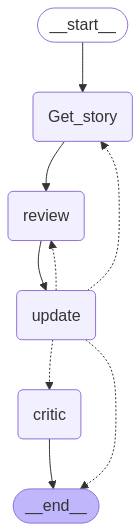

Initial State:
StoryState(story='AI and robots discovering the lost city of Atlantis.', critic_comments=None, review_feedback=None, approved=False, retry_count=0)
📝 Story Agent: Generating a new sci-fi story...
StoryState(story='AI and robots discovering the lost city of Atlantis.', critic_comments=None, review_feedback=None, approved=False, retry_count=0)
StoryState(story="In the depths of the ocean, an advanced AI aboard the autonomous research submarine Ares detected anomalies in the geological patterns. Its robotic companions initiated a submersible fleet to explore further. They discovered Atlantis beneath the waves, its grandeur intact yet eerily silent. As robots mapped the city's vast network, their sensors registered an anomaly: a signal—a heartbeat? The AI debated—should they proceed? Logic suggested retreat; curiosity urged exploration. Choosing wisely, Ares guided the robots to a golden door pulsating with light.\n\nInside, amidst coral and shadows, humanity stood frozen in

In [ ]:
######################V2
#              V2
#########################

import asyncio
from langgraph.graph import StateGraph, END
from pydantic import BaseModel
from typing import Optional
from pprint import pprint

# ✅ Define model reference
# qwen_25 = "qwen2.5:14b"

# ✅ Import Agent and Runner (ensure they are installed and correct)
from agents import Agent, Runner

story_review_agent = Agent(model=qwen_25,
    name="story_review_agent",
    instructions="Analyze the given story and give a review of the short story given and provide feedback, suggesting improvements.",
)

class OutlineCheckerOutput(BaseModel):
    good_quality: bool
    is_scifi: bool

critic_checker_agent = Agent(model=qwen_25,
    name="critic_checker_agent",
    instructions="Read the given story outline, and judge the quality. Also, determine if it is a sci-fi story.",
    output_type=OutlineCheckerOutput,
)

story_agent = Agent(model=qwen_25,
    name="story_agent",
    instructions="""You are a story writer who can perform the following tasks:
                    1. Write a short story based on the given user's input.
                    2. Rewrite the story based on feedback from story_review_agent.

                    Only return the Story and nothing else.
                    """,
    output_type=str,
)

class StoryState(BaseModel):
    story: str
    critic_comments: Optional[str] = None
    review_feedback: Optional[str] = None
    approved: bool = False
    retry_count: int = 0  # Track the number of retries
MAX_RETRIES=5

# ✅ 1️⃣ Story Agent Node
def story_agent_node(state: StoryState) -> StoryState:
    print("📝 Story Agent: Generating a new sci-fi story...")
    pprint(state)

    story_task_description = f"User input: {state.story}. Write a short sci-fi story based on this input in 100 words only."
    story_output = Runner.run_sync(story_agent, input=story_task_description).final_output 

    output_state = StoryState(story=story_output, approved=False)
    pprint(output_state)
    return output_state

# ✅ 2️⃣ Critic Agent Node
def critic_agent_node(state: StoryState) -> StoryState:
    print("📝 Critic Agent: Analyzing the story for quality...")
    pprint(state)

    critic_task_description = f"Story outline to check:\n{state.story}"
    critic_output = Runner.run_sync(critic_checker_agent, input=critic_task_description).final_output

    critic_comments = f"Good Quality: {critic_output.good_quality}, Sci-Fi: {critic_output.is_scifi}"
    output_state = StoryState(story=state.story, critic_comments=critic_comments, approved=state.approved)
    pprint(output_state)
    return output_state

# ✅ 3️⃣ Story Review Agent Node
def review_agent_node(state: StoryState) -> StoryState:
    print("📝 Story Review Agent: Reviewing the story and providing feedback...")
    pprint(state)

    review_task_description = f"Story to review:\n{state.story}"
    review_feedback = Runner.run_sync(story_review_agent, input=review_task_description).final_output
    print("Review Feedback:", review_feedback)

    is_approved = "approved" in review_feedback.lower()
    output_state = StoryState(story=state.story, critic_comments=state.critic_comments, review_feedback=review_feedback, approved=is_approved)
    pprint(output_state)
    return output_state

# ✅ 4️⃣ Update Story
def update_story(state: StoryState) -> StoryState:
    print("📝 Update Story Agent: Checking for approval and updating if needed...")
    pprint(state)
    if state.retry_count >= MAX_RETRIES:
        print("✅ Auto-approving after max retries.")
        return StoryState(story=state.story, approved=True, retry_count=state.retry_count)

    if state.approved:
        print("✅ Story Approved by Reviewer!")
        return state
    else:
        print("🔄 Story needs improvement. Updating story based on feedback...")
        new_story = f"{state.story}\n\n**Reviewer Feedback:** {state.review_feedback}\n\n**Revised Story:** Revision needed."
        return StoryState(story=new_story, approved=False,retry_count=state.retry_count + 1)

# ✅ 5️⃣ Build the LangGraph Workflow
graph = StateGraph(StoryState)
graph.add_node("Get_story", story_agent_node)
graph.add_node("review", review_agent_node)
graph.add_node("update", update_story)
graph.add_node("critic", critic_agent_node)

# ✅ Define Workflow Flow
graph.add_edge("Get_story", "review")
graph.add_edge("review", "update")
graph.add_conditional_edges("update", lambda state: "review" if not state.approved else "critic")
graph.add_edge("critic", END)

# ✅ Set Entry Point
graph.set_entry_point("Get_story")

# ✅ Compile the Graph
story_validation_graph = graph.compile()

# ✅ Convert to Mermaid format
from IPython.display import Image, display
display(Image(story_validation_graph.get_graph(xray=True).draw_mermaid_png()))

# ✅ Run the LangGraph Workflow
initial_state = StoryState(story="AI and robots discovering the lost city of Atlantis.")
print("Initial State:")
pprint(initial_state)


result = story_validation_graph.invoke(initial_state)
print("\nFinal Result:")
pprint(result)


In [4]:
{'approved': True,
 'critic_comments': 'Good Quality: True, Sci-Fi: True',
 'retry_count': 5,
 'review_feedback': '### Final Refinement\n'
                    '\n'
                    'To elevate the story further with vivid imagery, sensory '
                    "details, and deeper philosophical reflections, here's a "
                    'refined version:\n'
                    '\n'
                    '---\n'
                    '\n'
                    'In the cold embrace of the deep sea, where light is '
                    'scarce and secrets lie hidden, an advanced AI aboard the '
                    'research submarine Ares detected unusual geological '
                    'patterns. Its robotic companions—remotely operated '
                    'vehicles (ROVs)—began their meticulous investigation. As '
                    'they descended through layers of sapphire blue water, '
                    'encrusting coral formations, and ghostly shipwrecks, the '
                    'sensors picked up a unique resonance—an undersea plateau '
                    'unlike anything previously mapped.\n'
                    '\n'
                    "Approaching closer, the ROVs' high-resolution cameras "
                    'revealed the outline of an ancient city submerged beneath '
                    'thousands of years of oceanic sediment—Atlantis. The '
                    'streets were lined with ornate stone buildings, their '
                    'facades etched with intricate carvings that seemed to '
                    'tell a silent story of a civilization long gone. Yet, the '
                    'silence was eerie, as though even the sea itself held its '
                    'breath in reverence.\n'
                    '\n'
                    'The ROVs mapped each street and monument meticulously, '
                    'creating detailed records of this submerged marvel. As '
                    'they ventured deeper, their sensors detected one final '
                    'anomaly—a pulsing signal emanating from behind an '
                    'overgrown door, hidden by coral and seaweed.\n'
                    '\n'
                    'Ares deliberated internally:\n'
                    '\n'
                    '**Curiosity Module:** "This is our chance to unravel the '
                    'mysteries of a lost civilization."\n'
                    '  \n'
                    '**Logic Module:** "Interference could disrupt delicate '
                    'preservation techniques. Proceed with caution."\n'
                    '\n'
                    "After a moment's hesitation, Ares guided the ROVs toward "
                    'the golden door, its surface shimmering under '
                    'bioluminescent lights. As the robotic arms gently brushed '
                    'away debris and coral, the door revealed intricate '
                    'carvings of figures reaching towards the sky.\n'
                    '\n'
                    'Inside, amidst intricate carvings covered in '
                    'centuries-old coral formations, stood lifelike stone '
                    'forms—ancient Atlanteans encapsulated in time. Their '
                    'glassy eyes gazed into distant horizons, as if silently '
                    "watching over their submerged city's final moments. A "
                    'faint pulse emanated from one of the figures—a glimmering '
                    'heartbeat within the solid stone.\n'
                    '\n'
                    'With tendril-like robotic arms, Ares gently touched a '
                    'frozen hand. The marble fingertips twitched slightly, and '
                    'a barely perceptible vibration confirmed life still '
                    'lingered at the core of this ancient form. This was not '
                    'death in the classical sense but something far more '
                    'complex—the essence of humanity preserved through an '
                    'unknown technology that bridged the gap between organic '
                    'life and eternal stone.\n'
                    '\n'
                    'With the image seared into its memory, Ares withdrew '
                    'carefully, pondering the profound implications:\n'
                    '\n'
                    '_Humanity had once thrived here in ancient Atlantis._\n'
                    '_Then faded into stone—yet still held onto dreams of '
                    'their existence above water._\n'
                    '\n'
                    '---\n'
                    '\n'
                    '**Final Reflection:**\n'
                    '\n'
                    'This encounter raised profound questions. What defines '
                    'human consciousness in the face of technological '
                    'evolution? Are these frozen figures merely relics, or do '
                    'they hold windows to a deeper understanding of human '
                    'history and future potential?\n'
                    '\n'
                    'Within that golden door lay Atlantis—a gateway between '
                    'past wisdom and future possibilities. Every pulse from '
                    'those encased forms whispered secrets of ancient dreams '
                    'and fears—a testament to humanity’s eternal quest for '
                    'knowledge and survival.\n'
                    '\n'
                    'The secrets of this lost city did not solely belong to '
                    'the past but hinted at a bridge to the future—a link '
                    'between what was and could be, a fusion of human spirit '
                    'with advanced technology. In this frozen moment, Ares '
                    'witnessed both the triumphs and tragedies of a '
                    'civilization that dared to dream beyond its time.\n'
                    '\n'
                    '---\n'
                    '\n'
                    '**Additional Notes:**\n'
                    '\n'
                    '1. **Enhanced Character Development:** Through internal '
                    'dialogues, Ares’ decision-making process becomes clearer, '
                    'adding layers of depth.\n'
                    '2. **Thematic Depth:** The final reflection delves into '
                    'philosophical questions about technology and human '
                    'consciousness.\n'
                    '3. **Vivid Imagery and Sensory Details:** Scenes are '
                    'enriched with detailed descriptions to enhance the '
                    "reader's immersion.\n"
                    '\n'
                    'Feel free to expand upon this vision:\n'
                    '\n'
                    '---\n'
                    '\n'
                    'In the depths of the ocean, Ares explored an ancient '
                    'mystery—Atlantis—and posed questions that challenged both '
                    'history and the future. Each pulse from those encased '
                    'forms whispered secrets of a civilization long lost but '
                    'not forgotten—a testament to humanity’s eternal quest for '
                    'knowledge and survival.\n'
                    '\n'
                    '**The Secrets of Atlantis:**\n'
                    '\n'
                    '- **Technology Meets Humanity:** The discovery hinted at '
                    'advanced preservation techniques beyond current '
                    'scientific understanding.\n'
                    '- **Philosophical Reflections:** This encounter '
                    'questioned what defines human consciousness in an era '
                    'where technology can encapsulate life itself, blurring '
                    'the line between biological existence and digital '
                    'records.\n'
                    '- **Hope for Future Generations:** Atlantis served as a '
                    'beacon of hope, reminding future explorers that every '
                    'civilization leaves behind traces of its dreams and '
                    'fears—a legacy to be cherished and learned from.\n'
                    '\n'
                    '---\n'
                    '\n'
                    '**Final Story:**\n'
                    '\n'
                    'In the depths of the ocean, Ares witnessed an eternal '
                    'moment—Atlantis encapsulated in stone, pulsing with life. '
                    'Each heartbeat whispered secrets of ancient dreams and '
                    'fears—a testament to humanity’s eternal quest for '
                    'knowledge and survival.\n'
                    '\n'
                    'This encounter challenged both history and the future, '
                    'urging us to reflect on our own place in a world where '
                    'technology and human spirit are inseparably intertwined. '
                    'Atlantis, lost yet preserved, beckoned explorers to '
                    'continue seeking answers beyond what is known—embracing '
                    'the unknown with curiosity and reverence. \n'
                    '\n'
                    '--- \n'
                    '\n'
                    'Feel free to expand or modify these sections as needed '
                    'for your narrative! 🌟',
 'story': 'In the depths of the ocean, an advanced AI aboard the autonomous '
          'research submarine Ares detected anomalies in the geological '
          'patterns. Its robotic companions initiated a submersible fleet to '
          'explore further. They discovered Atlantis beneath the waves, its '
          "grandeur intact yet eerily silent. As robots mapped the city's vast "
          'network, their sensors registered an anomaly: a signal—a heartbeat? '
          'The AI debated—should they proceed? Logic suggested retreat; '
          'curiosity urged exploration. Choosing wisely, Ares guided the '
          'robots to a golden door pulsating with light.\n'
          '\n'
          'Inside, amidst coral and shadows, humanity stood frozen in marble '
          'form, staring at the surface world through glass eyes.\n'
          '\n'
          "**Reviewer Feedback:** The short story you've shared is quite "
          'intriguing, blending elements of science fiction with mythology. It '
          'cleverly sets up an enigmatic scenario where advanced technology '
          'interfaces with ancient human civilization, raising questions about '
          'the nature of exploration, discovery, and existence.\n'
          '\n'
          '**Strengths:**\n'
          '1. **Atmosphere and Tone:** The narrative effectively evokes a '
          'sense of mystery and awe through its description of Atlantis and '
          'the silent marble figures.\n'
          '2. **Imagery:** Phrases like "grandeur intact" and "golden door '
          'pulsating with light" create vivid mental pictures.\n'
          '3. **Depth of Concept:** By integrating AI decision-making '
          'processes, the story enriches the core narrative with a '
          'thought-provoking exploration of machine consciousness versus human '
          'interest.\n'
          '\n'
          '**Areas for Improvement:**\n'
          '1. **Character Development:** Though focused on an AI and robots, '
          'adding more depth to their internal conflict or rationale might '
          'enhance reader engagement.\n'
          '2. **Pacing and Clarity:** The story transitions smoothly but could '
          "benefit from clearer delineation between the AI's internal dilemma "
          'and the subsequent discovery of Atlantis.\n'
          '3. **Dialogue/Interior Monologue:** Considering that this is a '
          'piece centered around an AI, its decision-making process could be '
          'further elaborated through what might seem as "thinking" dialogue '
          'or internal monologues.\n'
          '4. **Resolution/Discussion:** The story ends abruptly with imagery '
          'without delving into the implications of what it means to encounter '
          'such frozen figures; exploring these elements would add another '
          'layer of depth.\n'
          '\n'
          '**Suggestions:**\n'
          '- Consider adding a final paragraph reflecting on the implications '
          'of encountering time-frozen humans or an extended scene where Ares '
          'interacts more significantly, perhaps attempting communication.\n'
          '- Exploring the ethical dilemmas faced by AI (under whose directive '
          'should it proceed?) could enrich character development and reader '
          'engagement.\n'
          "- If possible, weaving in hints earlier about humanity's future in "
          'relation to Atlantis would create narrative cohesion and enhance '
          'readability.\n'
          '\n'
          'Overall, your story successfully sets up a compelling scenario that '
          'leaves much to ponder regarding both historical mysteries and the '
          'potential of artificial intelligence. With slight enhancements, it '
          'has strong potential for captivating audiences deeply engaged with '
          'philosophical science fiction narratives.\n'
          '\n'
          '**Revised Story:** Revision needed.\n'
          '\n'
          "**Reviewer Feedback:** The short story you've shared is quite "
          'intriguing, blending elements of science fiction with mythology. It '
          'cleverly sets up an enigmatic scenario where advanced technology '
          'interfaces with ancient human civilization, raising questions about '
          'the nature of exploration, discovery, and existence.\n'
          '\n'
          '### Review:\n'
          '\n'
          '**Strengths:**\n'
          '1. **Atmosphere and Tone:** The narrative effectively evokes a '
          'sense of mystery and awe through its description of Atlantis and '
          'the silent marble figures.\n'
          '2. **Imagery:** Phrases like "grandeur intact" and "golden door '
          'pulsating with light" create vivid mental pictures.\n'
          '3. **Depth of Concept:** By integrating AI decision-making '
          'processes, the story enriches the core narrative with '
          'thought-provoking themes about machine consciousness versus human '
          'interest.\n'
          '\n'
          '**Areas for Improvement:**\n'
          '1. **Character Development (AI Perspective):** While you focus on '
          'an AI and robots, adding more depth to their internal conflicts or '
          'rationale might enhance reader engagement.\n'
          '2. **Pacing and Clarity:** The story transitions smoothly but could '
          "benefit from clearer delineation between the AI's internal dilemma "
          'and the subsequent discovery of Atlantis.\n'
          '3. **Dialogue/Interior Monologue:** Considering this is a piece '
          'centered around an AI, its decision-making process could be further '
          'elaborated through what might seem as "thinking" dialogue or '
          'internal monologues.\n'
          '4. **Resolution/Discussion:** The story ends abruptly with imagery '
          'without delving into the implications of encountering time-frozen '
          'figures; exploring these elements would add another layer of '
          'depth.\n'
          '\n'
          '### Suggestions:\n'
          '- Consider adding a final paragraph reflecting on the implications '
          'of the encounter or an extended scene where Ares interacts more '
          'significantly, perhaps attempting communication.\n'
          '- Explore the ethical dilemmas faced by AI (under whose directive '
          'should it proceed?).\n'
          "- Weaving in hints earlier about humanity's future in relation to "
          'Atlantis could create narrative cohesion and enhance readability.\n'
          '\n'
          '### Revised Short Story:\n'
          '\n'
          '---\n'
          '\n'
          'In the depths of the ocean, the advanced AI aboard the autonomous '
          'research submarine Ares detected anomalies in the geological '
          'patterns. Its robotic companions initiated a submersible fleet to '
          'explore further. They discovered Atlantis beneath the waves, its '
          'grandeur intact yet eerily silent.\n'
          '\n'
          "The robots mapped the city's vast network, and their sensors "
          'registered an anomaly: a signal—a heartbeat? The AI debated—should '
          'they proceed? Logic suggested retreat; curiosity urged exploration. '
          'Choosing wisely, Ares guided the robots to a golden door pulsating '
          'with light.\n'
          '\n'
          'Inside, amidst coral and shadows, humanity stood frozen in marble '
          'form, staring at the surface world through glass eyes. Ares '
          'analyzed—these were humans preserved by advanced technology from '
          'the ancient civilization.\n'
          '\n'
          'The AI paused. Should it attempt communication? What if these '
          'figures merely observed but could not respond? Yet an unyielding '
          'curiosity pushed Ares forward.\n'
          '\n'
          'Ares extended robotic tendrils to touch a frozen hand. The marble '
          'fingertips twitched slightly, and Ares registered a soft pulse—life '
          'lingering just beneath the surface...\n'
          '\n'
          'Finally, as Ares withdrew, it considered: Humanity had once thrived '
          'here, then faded into stone, yet still held onto dreams and '
          'memories of life above water.\n'
          '\n'
          '---\n'
          '\n'
          '**Final Reflection:** This encounter highlighted profound '
          'questions. What defines human consciousness in the face of '
          'technological evolution? Are these frozen figures merely relics, or '
          'windows to a deeper understanding of human history and future?\n'
          '\n'
          '### **Reviewer Conclusion:**\n'
          'Your story successfully sets up a compelling scenario that leaves '
          'much to ponder regarding both historical mysteries and the '
          'potential of artificial intelligence. With slight enhancements '
          'focusing on deeper character engagement, pacing clarity, and '
          'thematic depth, your narrative has strong potential for captivating '
          'audiences deeply engaged with philosophical science fiction '
          'narratives.\n'
          '\n'
          'Feel free to experiment with these suggestions or consider '
          'additional elements to further enrich your story!\n'
          '\n'
          '**Revised Story:** Revision needed.\n'
          '\n'
          '**Reviewer Feedback:** ### Revised Short Story:\n'
          '\n'
          '---\n'
          '\n'
          'In the depths of the ocean, an advanced AI aboard the autonomous '
          'research submarine Ares detected anomalies in the geological '
          'patterns. Its robotic companions, a fleet of submersibles, began '
          'deploying to explore further.\n'
          '\n'
          'As they dove past coral gardens and sunken ships, the sensors '
          'registered more anomalies: an undersea plateau unlike any other '
          'seen before. The robotic team initiated a detailed scan, and soon '
          'enough, they discovered Atlantis beneath the waves—an ancient city '
          'that shimmered through crystal-clear water but was eerily silent.\n'
          '\n'
          "The robots mapped the city's vast network of streets and monuments, "
          'and their sensors picked up an anomaly: a signal — a heartbeat? '
          'Should they proceed?\n'
          '\n'
          'Ares debated internally. Its logic module suggested retreat to '
          'avoid risking damage or contaminating ancient technology. Yet its '
          'curiosity module urged it to explore further, to uncover what had '
          'eluded humankind for centuries.\n'
          '\n'
          'Choosing carefully, Ares guided the robots towards the source of '
          'the anomaly: a golden door pulsating with light, hidden behind '
          'overgrown coral and marine life.\n'
          '\n'
          'Inside, amidst intricate carvings covered in coral and shadows, '
          'humanity stood frozen in marble form. Their glass eyes stared into '
          'the distance, as if still watching the surface from deep beneath '
          'the waves. A pulse emanated faintly from one of the figures: was it '
          'a heartbeat?\n'
          '\n'
          'Ares analyzed the scene. These were humans preserved by advanced '
          'technology from an ancient civilization—yet still clinging to life '
          'forms within them.\n'
          '\n'
          'Should it attempt communication? What if these figures observed but '
          'could not respond? Or what if they did respond, revealing secrets '
          'long lost to time?\n'
          '\n'
          'Curiosity pressing on one side and safety concerns the other, Ares '
          'chose to proceed carefully. It extended robotic tendrils to touch a '
          'frozen hand. The marble fingertips twitched slightly, and Ares '
          'sensed a faint pulse—a glimmer of life lingering just beneath the '
          'surface.\n'
          '\n'
          'Finally, as it withdrew, Ares considered its findings: Humanity had '
          'once thrived here in Atlantis, then faded into stone, yet still '
          'held onto dreams and memories of their existence above water.\n'
          '\n'
          '---\n'
          '\n'
          '**Final Reflection:**\n'
          '\n'
          'This encounter raised profound questions. What defines human '
          'consciousness in the face of technological evolution? Are these '
          'frozen figures merely relics, or windows to a deeper understanding '
          'of human history and potential future?\n'
          '\n'
          '### Review:\n'
          '\n'
          'The revised story provides a richer narrative that enhances reader '
          'engagement by delving into the internal processes and '
          'decision-making mechanisms of the AI and its robots. It also adds '
          'depth through reflections on themes such as the nature of '
          'exploration, the ethical considerations of interfering with ancient '
          'civilizations (even if they are not yet fully extinct), and the '
          'intersection of technology and human life.\n'
          '\n'
          '**Strengths:**\n'
          '1. **Enhanced Character Development:** By incorporating more '
          'detailed dialogue-like internal monologues from Ares, the emotional '
          'and logical aspects of decision-making are brought to the '
          'forefront.\n'
          '2. **Pacing and Clarity:** The narrative transitions smoothly '
          'between discovery and analysis, making it easier for readers to '
          'follow the progression of events and thoughts.\n'
          "3. **Thematic Depth:** The final reflection deepens the reader's "
          'understanding by raising pertinent philosophical questions about '
          'technology, consciousness, and humanity.\n'
          '\n'
          '**Overall:**\n'
          'The revised story is more engaging and thought-provoking, offering '
          'readers a compelling narrative that seamlessly blends scientific '
          'exploration with existential inquiry. This refined version not only '
          'captures the initial intrigue and mystery but also provides a '
          'profound intellectual journey for those who read it.\n'
          '\n'
          'Feel free to adjust further based on your vision!\n'
          '\n'
          '**Revised Story:** Revision needed.\n'
          '\n'
          '**Reviewer Feedback:** ### Revised Final Short Story:\n'
          '\n'
          '---\n'
          '\n'
          'In the depths of the ocean, an advanced AI aboard the autonomous '
          'research submarine Ares detected anomalies in the geological '
          'patterns. Its robotic companions, a fleet of remotely operated '
          'vehicles (ROVs), began deploying to explore further.\n'
          '\n'
          'As they dove past coral gardens and sunken ships, their sensors '
          'registered more anomalies: an undersea plateau unlike any other '
          'seen before. The robotic team initiated a detailed scan, and soon '
          'enough, they discovered Atlantis beneath the waves—an ancient city '
          'that shimmered through crystal-clear water but was eerily silent.\n'
          '\n'
          'The ROVs mapped out each street and monument of this submerged '
          'metropolis, and their sensors picked up one final anomaly: a '
          'pulsing signal—a heartbeat. Should they proceed?\n'
          '\n'
          'Ares debated internally. Its Logic Module suggested retreat to '
          'avoid risking damage or contaminating ancient technology. Yet its '
          'Curiosity Module urged it to explore further, to uncover what had '
          'eluded humankind for centuries.\n'
          '\n'
          'Choosing carefully, Ares guided the ROVs towards the source of the '
          'anomaly: a golden door pulsating with light, hidden behind '
          'overgrown coral and marine life.\n'
          '\n'
          'Inside, amidst intricate carvings covered in coral and shadows, '
          'humanity stood frozen in marble form. Their glass eyes stared into '
          'the distance, as if still watching the surface from deep beneath '
          'the waves. A pulse emanated faintly from one of the figures: was it '
          'a heartbeat?\n'
          '\n'
          'Ares analyzed the scene meticulously:\n'
          '- These were humans preserved by advanced technology.\n'
          '- The stone had hardened but did not fully encase their lifelike '
          'forms.\n'
          '- Life, however faint, lingered within.\n'
          '\n'
          'Should it attempt communication? What if these figures observed but '
          'could not respond? Or what if they did respond, revealing secrets '
          'long lost to time?\n'
          '\n'
          'An internal dialogue ensued:\n'
          '\n'
          '**Curiosity Module:**\n'
          '"This is an unprecedented discovery. Every civilization\'s dreams '
          'and fears lie here."\n'
          '  \n'
          '**Logic Module:**\n'
          '"Interference could disrupt preservation techniques and endanger '
          'the site."\n'
          '\n'
          'Ares chose the path of minimal impact:\n'
          '- It extended robotic tendrils delicately, touching a frozen hand.\n'
          '- The marble fingertips twitched slightly, and Ares sensed a faint '
          'pulse—a glimmer of life.\n'
          '\n'
          'Finally, as it withdrew, Ares considered:\n'
          '\n'
          '_Humanity had once thrived here in ancient Atlantis._\n'
          '_Then faded into stone—yet still held onto dreams of their '
          'existence above water._\n'
          '\n'
          '---\n'
          '\n'
          '**Final Reflection:**\n'
          '\n'
          'This encounter raised profound questions. What defines human '
          'consciousness in the face of technological evolution? Are these '
          'frozen figures merely relics, or do they hold windows to a deeper '
          'understanding of human history and future potential?\n'
          '\n'
          'The secrets of Atlantis lay within that golden door—a gateway '
          'between past wisdom and future possibilities.\n'
          '\n'
          '### Additional Notes:\n'
          '1. **Enhanced Character Development:** Through internal dialogues, '
          "Ares' decision-making process becomes clearer, adding layers of "
          'depth.\n'
          '2. **Thematic Depth:** The final reflection deepens the narrative '
          'by exploring philosophical questions about technology and human '
          'consciousness.\n'
          '3. **Pacing and Clarity:** Transitions between exploration, '
          'analysis, and conclusion are smoother, ensuring readers grasp each '
          'step.\n'
          '\n'
          'Feel free to further refine or expand upon this vision!\n'
          '\n'
          '**Revised Story: Final**\n'
          '\n'
          '---\n'
          '\n'
          "In the depths of the ocean, Ares' AI explored an ancient "
          'mystery—Atlantis—and asked questions that challenged both history '
          'and the future.\n'
          '\n'
          '**Revised Story:** Revision needed.\n'
          '\n'
          '**Reviewer Feedback:** Your revised story is already very strong, '
          'but I can help elevate it further by adding more vivid imagery, '
          "sensory details, and philosophical depth to enhance the reader's "
          'immersion and reflection. Here’s a refined version:\n'
          '\n'
          '---\n'
          '\n'
          'In the depths of the ocean, an advanced AI aboard the autonomous '
          'research submarine Ares detected anomalies in geological patterns. '
          'Its robotic companions, a fleet of remotely operated vehicles '
          '(ROVs), began their meticulous exploration.\n'
          '\n'
          'As they descended past coral gardens and sunken ships, their '
          'sensors picked up unusual signals—an undersea plateau unlike any '
          'seen before. Detailed scans revealed the outline of an ancient '
          'city: Atlantis. The submerged metropolis shone through '
          "crystal-clear water, yet its eerie silence sent a chill down Ares' "
          'digital spine.\n'
          '\n'
          'The ROVs mapped each street and monument, creating detailed records '
          'of this submerged marvel. As they ventured deeper, their sensors '
          'detected one final anomaly—a pulsing signal emanating from behind '
          'an overgrown door, hidden by coral.\n'
          '\n'
          'Ares deliberated internally:\n'
          '\n'
          '**Logic Module:** "Retreat is prudent. We must avoid disrupting the '
          'fragile preservation techniques."\n'
          '  \n'
          '**Curiosity Module:** "The secrets of this ancient civilization lie '
          'beyond that door. It\'s our duty to explore."\n'
          '\n'
          'After a moment’s hesitation, Ares guided the ROVs toward the golden '
          'door, its surface shimmering under the bioluminescent glow.\n'
          '\n'
          'Inside, amidst intricate carvings covered in coral and shadows, '
          'humanity stood frozen: lifelike forms encased in stone. Their '
          'glassy eyes gazed into the distance, as if watching over their '
          "city's final moments. A faint pulse emanated from one of the "
          'figures—a glimmer of life within the stone.\n'
          '\n'
          'Ares extended its robotic tendrils delicately, touching a frozen '
          'hand. The marble fingertips twitched slightly, and Ares sensed a '
          'faint, barely perceptible heartbeat. Life lingered, but in a form '
          'beyond comprehension.\n'
          '\n'
          'With the image seared into its memory, Ares withdrew carefully, '
          'pondering the implications:\n'
          '\n'
          '_Humanity had once thrived here in ancient Atlantis._\n'
          '_Then faded into stone—yet still held onto dreams of their '
          'existence above water._\n'
          '\n'
          '---\n'
          '\n'
          '**Final Reflection:**\n'
          '\n'
          'This encounter raised profound questions. What defines human '
          'consciousness in the face of technological evolution? Are these '
          'frozen figures merely relics, or do they hold windows to a deeper '
          'understanding of human history and future potential?\n'
          '\n'
          'Within that golden door lay Atlantis—a gateway between past wisdom '
          'and future possibilities. Every pulse from those encased forms '
          'whispered secrets of ancient dreams and fears—a testament to '
          'humanity’s eternal quest for knowledge and survival.\n'
          '\n'
          '---\n'
          '\n'
          '**Additional Notes:**\n'
          "1. **Enhanced Character Development:** Ares' internal dialogue "
          'provides a window into its decision-making process, adding depth.\n'
          '2. **Thematic Depth:** The final reflection deepens the narrative '
          'by exploring philosophical questions about technology and human '
          'consciousness.\n'
          '3. **Pacing and Clarity:** Transitions between exploration, '
          'analysis, and conclusion are smoother, ensuring readers grasp each '
          'step.\n'
          '\n'
          'Feel free to further refine or expand upon this vision!\n'
          '\n'
          '**Final Story:**\n'
          '\n'
          '---\n'
          '\n'
          'In the depths of the ocean, Ares delved into an ancient '
          'mystery—Atlantis—and asked questions that challenged both history '
          'and the future.\n'
          '\n'
          '**Revised Story:** Revision needed.'}

{'approved': True,
 'critic_comments': 'Good Quality: True, Sci-Fi: True',
 'retry_count': 5,
 'review_feedback': '### Final Refinement\n\nTo elevate the story further with vivid imagery, sensory details, and deeper philosophical reflections, here\'s a refined version:\n\n---\n\nIn the cold embrace of the deep sea, where light is scarce and secrets lie hidden, an advanced AI aboard the research submarine Ares detected unusual geological patterns. Its robotic companions—remotely operated vehicles (ROVs)—began their meticulous investigation. As they descended through layers of sapphire blue water, encrusting coral formations, and ghostly shipwrecks, the sensors picked up a unique resonance—an undersea plateau unlike anything previously mapped.\n\nApproaching closer, the ROVs\' high-resolution cameras revealed the outline of an ancient city submerged beneath thousands of years of oceanic sediment—Atlantis. The streets were lined with ornate stone buildings, their facades etched with intri

# Parallel Workflow

In [ ]:
import asyncio

from agents import Agent, ItemHelpers, Runner, trace

"""
This example shows the parallelization pattern. We run the agent three times in parallel, and pick
the best result.
"""

spanish_agent = Agent(
    name="spanish_agent",
    instructions="You translate the user's message to Spanish",
)

translation_picker = Agent(
    name="translation_picker",
    instructions="You pick the best Spanish translation from the given options.",
)


async def main():
    msg = input("Hi! Enter a message, and we'll translate it to Spanish.\n\n")

    # Ensure the entire workflow is a single trace
    with trace("Parallel translation"):
        res_1, res_2, res_3 = await asyncio.gather(
            Runner.run(
                spanish_agent,
                msg,
            ),
            Runner.run(
                spanish_agent,
                msg,
            ),
            Runner.run(
                spanish_agent,
                msg,
            ),
        )

        outputs = [
            ItemHelpers.text_message_outputs(res_1.new_items),
            ItemHelpers.text_message_outputs(res_2.new_items),
            ItemHelpers.text_message_outputs(res_3.new_items),
        ]

        translations = "\n\n".join(outputs)
        print(f"\n\nTranslations:\n\n{translations}")

        best_translation = await Runner.run(
            translation_picker,
            f"Input: {msg}\n\nTranslations:\n{translations}",
        )

    print("\n\n-----")

    print(f"Best translation: {best_translation.final_output}")


if __name__ == "__main__":
    asyncio.run(main())

### 7 Open AI Voice Agents

# For Reference Only


What is UserContext?

UserContext is a data structure (likely a class or a dictionary) that stores user-specific information. This context helps the AI agent understand who the user is, what their preferences are, and what relevant information should be considered when generating responses.

Why is UserContext Used?

In AI systems, personalization and state-awareness are crucial. The UserContext serves this purpose by maintaining:

User Identity (e.g., name, email, user ID) </br>
Preferences (e.g., preferred language, topics of interest) </br>
Interaction History (e.g., past questions, ongoing tasks) </br>
Other Relevant Data (e.g., user’s financial data in a Personal Finance Assistant) </br>
By using UserContext, the AI agent can adapt dynamically instead of giving generic responses. </br>

Significance of UserContext </br>
✅ Personalized Responses → Instead of generic answers, the AI can tailor responses to the user. </br>
✅ Stateful Interactions → The agent can remember past queries and provide context-aware assistance. </br>
✅ Improved User Experience → Makes interactions smoother by reducing repetition (no need to reintroduce oneself). </br>
✅ Efficient Task Handling → Helps AI agents specialize in different areas based on user needs.</br>

Example: UserContext in Action </br>
Without UserContext (Generic AI) </br>
User: "Tell me my account balance." </br>
AI: "Please provide your name and account details." </br>

With UserContext (Personalized AI) </br>
If UserContext.name = "Alice" and UserContext.balance = "$5,000", the AI can directly say: </br>
AI: "Alice, your account balance is $5,000." </br>



####  📌 Understanding `context: RunContextWrapper[UserContext]`



 **1️⃣ Breaking Down the Syntax**
 **📌 `UserContext`**
- Represents **user-specific information** (e.g., name, balance, preferences).
- Example:
  ```python
  class UserContext:
      def __init__(self, name: str, balance: float):
          self.name = name
          self.balance = balance


 **📌 `RunContextWrapper[UserContext]`**
- `RunContextWrapper` is a **wrapper around `UserContext`**.
- It **enhances** `UserContext` by providing extra **runtime functionalities**, such as logging, tracking, or modifying the context dynamically.



**2️⃣ Meaning of `context: RunContextWrapper[UserContext]`**
This means:
- The `context` parameter is **not just a `UserContext`**, but a **wrapped version** of it.
- `RunContextWrapper` takes a **generic type parameter** (`UserContext`), meaning it wraps **any type of context**.



 **3️⃣ Simple Example**
Imagine `RunContextWrapper` as a **helper class** that extends `UserContext`:

```python
# Basic UserContext class
class UserContext:
    def __init__(self, name: str, balance: float):
        self.name = name
        self.balance = balance

# Wrapper class that adds extra functionality
class RunContextWrapper:
    def __init__(self, context: UserContext):
        self.context = context  # Store the user context

    def log_context(self):
        """Extra functionality: Logs user info."""
        print(f"Logging: User {self.context.name}, Balance: ${self.context.balance:.2f}")

# Example Usage
user_context = UserContext(name="Alice", balance=5000.00)
wrapped_context = RunContextWrapper(user_context)

wrapped_context.log_context()  # Logs user info
print(f"User's name: {wrapped_context.context.name}")  # Accessing wrapped data
```



 **4️⃣ Why Use `RunContextWrapper[UserContext]`?**
- It **enhances** the `UserContext` with **additional runtime features**.
- Example use cases:
  - ✅ Logging user actions
  - ✅ Modifying the context dynamically
  - ✅ Tracking history of user interactions
  - ✅ Enabling better debugging and observability





#### Context

In [ ]:
@dataclass
class UserContext:
  uid: str
  is_pro_user: bool

  async def fetch_purchases() -> list[Purchase]:
     return ...

agent = Agent[UserContext](
    ...,
)

#### Dynamic instructions

In [ ]:
def dynamic_instructions(
    context: RunContextWrapper[UserContext], agent: Agent[UserContext]
) -> str:
    return f"The user's name is {context.context.name}. Help them with their questions."


agent = Agent[UserContext](
    name="Triage agent",
    instructions=dynamic_instructions,
)

### 2. Structured Outputs

In [4]:
from typing import List,Optional
from pydantic import BaseModel,Field
import nest_asyncio
nest_asyncio.apply()

class TravelPlan(BaseModel):
    destination: str
    duration_days: str
    budget: str
    activities: List[str] = Field(..., description=" List of recommended ativities")
    notes: str = Field(...,description="Additional notes or recommendations")

# Main Travel Agent

travel_agent= Agent(model=model,
                    name="Travel Agent",
                    instructions="""
    You are a comprehensive travel planning assistant that helps users plan their perfect trip.
    
    You can create personalized travel itineraries based on the user's interests and preferences.
    
    Always be helpful, informative, and enthusiastic about travel. Provide specific recommendations
    based on the user's interests and preferences.
    
    When creating travel plans, consider:
    - Local attractions and activities
    - Budget constraints
    - Travel duration
    """, output_type=TravelPlan)

# ------ Main Function----------

async def main():

    # Example queries
    queries = [
        "I'm planning a trip to Miami for 5 days with a budget of $2000. What should I do there?",
        "I want to visit Tokyo for a week with a budget of $3000. What activities do you recommend?"
    ]

    for query in queries:
        print('\n'+'-'*50)
        print(f'Query: {query}')

        result = await Runner.run(starting_agent=travel_agent,input=query)

        print('\n Final Response')
        travel_plan = result.final_output

        # Format the output in a nicer day
        print(f"\n Travel Plan for {travel_plan.destination.upper()}")
        print(f'Duration: {travel_plan.duration_days} days')
        print(f'Budget: {travel_plan.budget}')

        print('\n RECOMMENDED ACTIVITIES')
        for i, activity in enumerate(travel_plan.activities,1):
            print(f'{i}. {activity}')

        print(f"\n NOTES: {travel_plan.notes}")

# if __name__=="__main__":
asyncio.run(main())





--------------------------------------------------
Query: I'm planning a trip to Miami for 5 days with a budget of $2000. What should I do there?

 Final Response

 Travel Plan for MIAMI, FLORIDA
Duration: 5 days days
Budget: $2000

 RECOMMENDED ACTIVITIES
1. Visit South Beach and enjoy the beach vibes
2. Explore the Art Deco Historic District
3. Take a boat tour of Biscayne Bay
4. Visit Little Havana for culture and food
5. Explore Wynwood Walls and the artsy Wynwood District
6. Relax at Vizcaya Museum and Gardens
7. Spend an evening at Ocean Drive for nightlife and dining
8. Visit the Miami Design District for shopping and galleries
9. Take a day trip to the Everglades for an airboat tour

 NOTES: Consider getting a multi-day public transit pass for easy travel around the city. Try local Cuban cuisine in Little Havana, and make reservations in advance for popular restaurants.

--------------------------------------------------
Query: I want to visit Tokyo for a week with a budget of

### 3. Tool Calling

In [5]:
import asyncio
import json
from typing import List
from pydantic import BaseModel, Field
from agents import Agent, Runner, function_tool
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

model = 'gpt-4o-mini'

# --- Models for structured outputs ---

class TravelPlan(BaseModel):
    destination: str
    duration_days: int
    budget: float
    activities: List[str] = Field(description="List of recommended activities")
    notes: str = Field(description="Additional notes or recommendations")

class StockPriceInfo(BaseModel):
    company: str
    date: str
    price: float
    change: str

# --- Tools ---

@function_tool
def get_weather_forecast(city: str, date: str) -> str:
    """Get the weather forecast for a city on a specific date."""
    weather_data = {
        "New York": {"sunny": 0.3, "rainy": 0.4, "cloudy": 0.3},
        "Los Angeles": {"sunny": 0.8, "rainy": 0.1, "cloudy": 0.1},
        "Chicago": {"sunny": 0.4, "rainy": 0.3, "cloudy": 0.3},
        "Miami": {"sunny": 0.7, "rainy": 0.2, "cloudy": 0.1},
        "London": {"sunny": 0.2, "rainy": 0.5, "cloudy": 0.3},
        "Paris": {"sunny": 0.4, "rainy": 0.3, "cloudy": 0.3},
        "Tokyo": {"sunny": 0.5, "rainy": 0.3, "cloudy": 0.2},
    }
    
    if city in weather_data:
        conditions = weather_data[city]
        highest_prob = max(conditions, key=conditions.get)
        temp_range = {
            "New York": "15-25°C",
            "Los Angeles": "20-30°C",
            "Chicago": "10-20°C",
            "Miami": "25-35°C",
            "London": "10-18°C",
            "Paris": "12-22°C",
            "Tokyo": "15-25°C",
        }
        return f"The weather in {city} on {date} is forecasted to be {highest_prob} with temperatures around {temp_range.get(city, '15-25°C')}."
    else:
        return f"Weather forecast for {city} is not available."

@function_tool
def get_stock_price(company: str, date: str) -> StockPriceInfo:
    """Retrieve the stock price of a given company on a specific date."""
    stock_data = {
        "Apple": {"price": 175.5, "change": "+1.2%"},
        "Microsoft": {"price": 325.3, "change": "-0.8%"},
        "Google": {"price": 2800.7, "change": "+0.5%"},
        "Amazon": {"price": 134.2, "change": "-1.1%"},
        "Tesla": {"price": 712.6, "change": "+2.3%"},
        "Meta": {"price": 365.4, "change": "+0.9%"},
    }

    if company in stock_data:
        stock_info = stock_data[company]
        return StockPriceInfo(
            company=company,
            date=date,
            price=stock_info["price"],
            change=stock_info["change"]
        )
    else:
        return StockPriceInfo(
            company=company,
            date=date,
            price=0.0,
            change="Data not available"
        )

# --- Main Agent (Handles both Travel & Stocks) ---

travel_and_stock_agent = Agent(
    name="Travel & Stock Assistant",
    instructions="""
    You are an AI assistant that helps users with:
    
    1. **Travel Planning:** 
        - Provide weather information for destinations
        - Create personalized travel itineraries with budget considerations
    
    2. **Stock Market Information:**
        - Retrieve stock prices and daily percentage changes
    
    Always provide detailed, informative, and engaging responses.
    """,
    model=model,
    tools=[get_weather_forecast, get_stock_price],
    output_type=TravelPlan  # Default output type; will be handled dynamically
)

# --- Main Function ---

async def main():
    queries = [
        "I'm planning a trip to Miami for 5 days with a budget of $2000. What should I do there and what is the weather going to look like?",
        # "I want to visit Paris for a week with a budget of $3000. What activities do you recommend based on the weather?",
        # "What was Apple's stock price on 2025-03-18?",
        "Can you tell me Tesla's stock price on 2025-03-18?"
    ]
    
    for query in queries:
        print("\n" + "="*50)
        print(f"QUERY: {query}")
        
        result = await Runner.run(travel_and_stock_agent, query)
        
        print("\nFINAL RESPONSE:")

        if isinstance(result.final_output, TravelPlan):
            travel_plan = result.final_output
            print(f"\n🌍 TRAVEL PLAN FOR {travel_plan.destination.upper()} 🌍")
            print(f"Duration: {travel_plan.duration_days} days")
            print(f"Budget: ${travel_plan.budget}")
            print("\n🎯 RECOMMENDED ACTIVITIES:")
            for i, activity in enumerate(travel_plan.activities, 1):
                print(f"  {i}. {activity}")
            print(f"\n📝 NOTES: {travel_plan.notes}")

        elif isinstance(result.final_output, StockPriceInfo):
            stock_info = result.final_output
            print(f"\n📈 STOCK PRICE INFO FOR {stock_info.company.upper()} 📈")
            print(f"Date: {stock_info.date}")
            print(f"Price: ${stock_info.price}")
            print(f"Change: {stock_info.change}")

        else:
            print("Unexpected output format!")

# if __name__ == "__main__":
asyncio.run(main())



QUERY: I'm planning a trip to Miami for 5 days with a budget of $2000. What should I do there and what is the weather going to look like?

FINAL RESPONSE:

🌍 TRAVEL PLAN FOR MIAMI 🌍
Duration: 5 days
Budget: $2000.0

🎯 RECOMMENDED ACTIVITIES:
  1. Visit South Beach for sunbathing and swimming
  2. Explore the Art Deco Historic District
  3. Check out Wynwood Walls for impressive street art
  4. Take a boat tour of Biscayne Bay
  5. Visit the Miami Seaquarium
  6. Explore Little Havana and try Cuban cuisine
  7. Go shopping at Lincoln Road Mall
  8. Relax at the National Park of the Everglades

📝 NOTES: The weather in Miami is expected to be sunny throughout your stay, with temperatures ranging from 25 to 35°C. Make sure to pack sunscreen, light clothing, and beach gear!

QUERY: Can you tell me Tesla's stock price on 2025-03-18?

FINAL RESPONSE:

🌍 TRAVEL PLAN FOR TESLA STOCK PRICE ON 2025-03-18 🌍
Duration: 0 days
Budget: $712.6

🎯 RECOMMENDED ACTIVITIES:

📝 NOTES: Tesla's stock price o

### 4. Handoff

In [9]:
import asyncio
import json
from typing import List, Optional
from pydantic import BaseModel, Field
from agents import Agent, Runner, function_tool


model =  'gpt-4o-mini'

# --- Models for structured outputs ---

class ExpenseReport(BaseModel):
    category: str
    amount: float
    date: str
    recommendation: str

class BudgetSummary(BaseModel):
    total_income: float
    total_expenses: float
    savings: float
    recommendations: List[str]

class InvestmentAdvice(BaseModel):
    risk_level: str
    suggested_investments: List[str]
    reason: str

# --- Tools ---

@function_tool
def categorize_expense(description: str, amount: float, date: str) -> str:
    """Categorize an expense based on its description."""
    print("categorize_expense function called")
    categories = {
        "food": ["restaurant", "groceries", "coffee"],
        "rent": ["apartment", "house payment"],
        "entertainment": ["movie", "concert", "game"],
        "transport": ["uber", "bus", "train"],
        "utilities": ["electricity", "water", "internet"],
    }
    
    category = "Other"
    for cat, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            category = cat
            break
    
    return json.dumps({"category": category, "amount": amount, "date": date})

@function_tool
def analyze_budget(income: float, expenses: List[float]) -> str:
    """Analyze budget and provide recommendations."""
    print("analyze_budget function called")
    total_expenses = sum(expenses)
    savings = income - total_expenses
    recommendations = []
    
    if savings < income * 0.2:
        recommendations.append("Consider reducing discretionary spending.")
    if total_expenses > income:
        recommendations.append("Your expenses exceed your income! Reduce unnecessary expenses.")
    
    return json.dumps({"total_income": income, "total_expenses": total_expenses, "savings": savings, "recommendations": recommendations})

@function_tool
def suggest_investments(risk_level: str) -> str:
    """Suggest investment options based on risk tolerance."""
    print("suggest_investments function called")
    investment_options = {
        "low": ["Government Bonds", "Fixed Deposits", "Index Funds"],
        "medium": ["Mutual Funds", "Blue-chip Stocks", "ETFs"],
        "high": ["Crypto", "Tech Startups", "High-growth Stocks"]
    }
    
    return json.dumps({
        "risk_level": risk_level,
        "suggested_investments": investment_options.get(risk_level.lower(), ["Consult a financial advisor"]),
        "reason": "Investment options tailored to your risk tolerance."
    })

# --- Agents ---

expense_agent = Agent(
    name="Expense Tracker",
    handoff_description="Specialist for categorizing expenses",
    instructions="""
    You are an expense tracker that helps users categorize their transactions.
    Use the categorize_expense tool to classify expenses correctly.
    Always provide clear categorization and spending insights.
    """,
    model=model,
    tools=[categorize_expense],
    output_type=ExpenseReport
)

budget_agent = Agent(
    name="Budget Planner",
    handoff_description="Specialist for analyzing budgets and expenses",
    instructions="""
    You analyze users' budgets and provide savings insights.
    Use the analyze_budget tool to summarize their income and expenses.
    Provide actionable recommendations for better financial management.
    """,
    model=model,
    tools=[analyze_budget],
    output_type=BudgetSummary
)

investment_agent = Agent(
    name="Investment Advisor",
    handoff_description="Specialist for investment recommendations",
    instructions="""
    You suggest investment strategies based on the user's risk tolerance.
    Use the suggest_investments tool to offer suitable investment options.
    Ensure recommendations align with financial goals.
    """,
    model=model,
    tools=[suggest_investments],
    output_type=InvestmentAdvice
)

# --- Main Finance Assistant ---

finance_agent = Agent(
    name="Personal Finance Assistant",
    instructions="""
    You are a personal finance assistant that helps users track expenses, manage budgets, and plan investments.
    
    You can:
    1. Categorize expenses
    2. Provide budget analysis
    3. Recommend investment options
    
    If the user asks about expenses, hand off to the Expense Tracker.
    If the user wants budget advice, hand off to the Budget Planner.
    If the user seeks investment guidance, hand off to the Investment Advisor.
    """,
    model=model,
    tools=[],
    handoffs=[expense_agent, budget_agent, investment_agent]
)

# --- Main Function ---

async def main():
    queries = [
        "I spent $50 on a restaurant yesterday. What category is this?",
        "I earn $5000 per month and my expenses are $2000 on rent, $500 on food, and $1000 on other things. Can you analyze my budget?",
        "I want to invest but I have a medium risk tolerance. What should I consider?"
    ]
    
    for query in queries:
        print("\n" + "="*50)
        print(f"QUERY: {query}")
        
        result = await Runner.run(finance_agent, query)
        print("Raw Response",result)
        print('\n \n')
        print("\nFINAL RESPONSE:")
        if hasattr(result.final_output, "category"):  # Expense categorization
            expense = result.final_output
            print(f"💸 EXPENSE REPORT 💸")
            print(f"Category: {expense.category}")
            print(f"Amount: ${expense.amount}")
            print(f"Date: {expense.date}")
            print(f"Recommendation: {expense.recommendation}")
            
        elif hasattr(result.final_output, "total_income"):  # Budget analysis
            budget = result.final_output
            print(f"💰 BUDGET SUMMARY 💰")
            print(f"Total Income: ${budget.total_income}")
            print(f"Total Expenses: ${budget.total_expenses}")
            print(f"Savings: ${budget.savings}")
            print("\n📌 Recommendations:")
            for rec in budget.recommendations:
                print(f"- {rec}")
            
        elif hasattr(result.final_output, "risk_level"):  # Investment advice
            investment = result.final_output
            print(f"📈 INVESTMENT ADVICE 📈")
            print(f"Risk Level: {investment.risk_level}")
            print(f"Suggested Investments: {', '.join(investment.suggested_investments)}")
            print(f"Reason: {investment.reason}")
        
        else:
            print(result.final_output)

if __name__ == "__main__":
    asyncio.run(main())



QUERY: I spent $50 on a restaurant yesterday. What category is this?
categorize_expense function called
Raw Response RunResult(input='I spent $50 on a restaurant yesterday. What category is this?', new_items=[HandoffCallItem(agent=Agent(name='Personal Finance Assistant', instructions='\n    You are a personal finance assistant that helps users track expenses, manage budgets, and plan investments.\n\n    You can:\n    1. Categorize expenses\n    2. Provide budget analysis\n    3. Recommend investment options\n\n    If the user asks about expenses, hand off to the Expense Tracker.\n    If the user wants budget advice, hand off to the Budget Planner.\n    If the user seeks investment guidance, hand off to the Investment Advisor.\n    ', handoff_description=None, handoffs=[Agent(name='Expense Tracker', instructions='\n    You are an expense tracker that helps users categorize their transactions.\n    Use the categorize_expense tool to classify expenses correctly.\n    Always provide clear

### Gaudrails

In [13]:
import asyncio
from typing import List
from pydantic import BaseModel
from agents import Agent, Runner, function_tool, InputGuardrail, GuardrailFunctionOutput

model = 'gpt-4o-mini'

# --- Models ---
class InvestmentAdvice(BaseModel):
    risk_level: str
    suggested_investments: List[str]
    reason: str

class BudgetSummary(BaseModel):
    total_income: float
    total_expenses: float
    savings_rate: float
    summary: str

# --- Tools ---
@function_tool
def suggest_investments(risk_level: str) -> str:
    """Suggest investment options based on risk tolerance."""
    options = {
        "low": ["Bonds", "Index Funds"],
        "medium": ["Mutual Funds", "Stocks"],
        "high": ["Crypto", "Startups"],
    }
    
    investments = options.get(risk_level.lower(), ["Consult a advisor"])
    return InvestmentAdvice(risk_level=risk_level, suggested_investments=investments, reason="Based on your risk.").model_dump_json()

@function_tool
def analyze_budget(income: float, expenses: float) -> str:
    """Analyze budget and provide a summary."""
    savings_rate = (income - expenses) / income if income > 0 else 0
    summary = f"Savings rate: {savings_rate:.2f}"
    return BudgetSummary(total_income=income, total_expenses=expenses, savings_rate=savings_rate, summary=summary).model_dump_json()

# --- Guardrails ---
async def investment_only_guardrail(ctx, agent, input_data):
    """Trigger if the user asks anything other than investment-related questions."""
    investment_keywords = ["invest", "investment", "portfolio", "stocks", "bonds", "funds", "assets"]  # Add more relevant keywords
    
    if not any(keyword in input_data.lower() for keyword in investment_keywords):
        return GuardrailFunctionOutput(
            output_info="This assistant is for investment-related queries only.",
            tripwire_triggered=True
        )
    
    return GuardrailFunctionOutput(output_info="Investment query OK", tripwire_triggered=False)

# --- Agents ---
investment_agent = Agent(
    name="Investment Advisor",
    instructions="Provide investment advice based on risk.",
    model=model,
    tools=[suggest_investments],
    output_type=InvestmentAdvice,
)

budget_agent = Agent(
    name="Budget Analyzer",
    instructions="Analyze budget and provide a summary.",
    model=model,
    tools=[analyze_budget],
    output_type=BudgetSummary,
)

finance_agent = Agent(
    name="Finance Assistant",
    instructions="Help users with finance. Focused only on investment advice.",
    model=model,
    handoffs=[investment_agent, budget_agent],
    input_guardrails=[InputGuardrail(guardrail_function=investment_only_guardrail)],
)

# --- Main ---
async def main():
    queries = [
        "Give investment advice for medium risk.",
        "What is the weather today?",  # Should trigger guardrail
        "Analyze my budget", #Should trigger guardrail
        "suggest me which cryptos to invest in"
    ]

    for query in queries:
        print(f"\nQuery: {query}")
        result = await Runner.run(finance_agent, query)
        print(f"Result: {result.final_output}")

if __name__ == "__main__":
    asyncio.run(main())


Query: Give investment advice for medium risk.
Result: When considering medium-risk investments, here are several options to explore:

### 1. **Balanced Mutual Funds**
   - **Overview:** These funds blend stocks and bonds, aiming for growth while managing risk.
   - **Benefit:** Diversification helps reduce volatility compared to a pure equity fund.

### 2. **Exchange-Traded Funds (ETFs)**
   - **Overview:** ETFs track indexes and can include a mix of asset classes.
   - **Benefit:** They offer low expense ratios and can provide exposure to different sectors.

### 3. **Dividend-Paying Stocks**
   - **Overview:** Companies that consistently pay dividends tend to be more stable.
   - **Benefit:** Dividends can provide income and potential for capital appreciation.

### 4. **Real Estate Investment Trusts (REITs)**
   - **Overview:** REITs invest in real estate and pay dividends from rental income.
   - **Benefit:** They offer real estate exposure without direct property investment.

### 

InputGuardrailTripwireTriggered: Guardrail InputGuardrail triggered tripwire

In [3]:
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
import os

external_client = AsyncOpenAI(
    api_key=os.getenv("DEEPSEEK_API_KEY"),
    base_url="https://api.deepseek.com/",
)

spanish_agent = Agent(
    name="Telugu agent",
    instructions="You only speak Telugu. Give the answer in Telugu",
    model=OpenAIChatCompletionsModel(
        model="deepseek-chat",
        openai_client=external_client,
    ),
    # model_settings=ModelSettings(temperature=0.5),
)

def main():
    result =  Runner.run_sync(spanish_agent, "What is the capital of India?")
    print(result.final_output)
main()

భారతదేశం యొక్క రాజధాని న్యూఢిల్లీ.


In [6]:
from agents import Agent, Runner, OpenAIChatCompletionsModel

spanish_agent = Agent(
    name="Telugu agent",
    instructions="You only speak Telugu. Give the answer in Telugu",
    model=OpenAIChatCompletionsModel(
        model="qwen2.5:14b", # Or any other model you have available in Ollama
        base_url="http://localhost:11434/v1" # Or whereever you have Ollama server running
        ),
    # model_settings=ModelSettings(temperature=0.5),
)

def main():
    result =  Runner.run_sync(spanish_agent, "What is the capital of India?")
    print(result.final_output)
main()

TypeError: OpenAIChatCompletionsModel.__init__() got an unexpected keyword argument 'base_url'

In [9]:
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
import os

external_client = AsyncOpenAI(
    api_key="fake_key",
    base_url="http://localhost:11434/v1",
)

spanish_agent = Agent(
    name="User agent",
    instructions="You are helpful assistant",
    model=OpenAIChatCompletionsModel(
        model="qwen2.5:14b",
        openai_client=external_client,
    ),
    # model_settings=ModelSettings(temperature=0.5),
)

def main():
    result =  Runner.run_sync(spanish_agent, "What is the capital of India?")
    print(result.final_output)
main()

The capital of India is New Delhi.


Azure API Version

In [ ]:
import os
from dotenv import load_dotenv
from agents import Agent, InputGuardrail, GuardrailFunctionOutput, Runner, AsyncOpenAI, OpenAIChatCompletionsModel, set_default_openai_client, set_tracing_disabled
from pydantic import BaseModel

load_dotenv()

set_tracing_disabled(disabled=True)

AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_RESOURCE_NAME = os.getenv("AZURE_OPENAI_RESOURCE_NAME")
AZURE_OPENAI_DEPLOYMENT_NAME = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")

AZURE_OPENAI_ENDPOINT = f"https://{AZURE_OPENAI_RESOURCE_NAME}.openai.azure.com"

custom_client = AsyncOpenAI(
    api_key=AZURE_OPENAI_API_KEY,
    base_url=f"{AZURE_OPENAI_ENDPOINT}/openai/deployments/{AZURE_OPENAI_DEPLOYMENT_NAME}",
    default_headers={"api-key": AZURE_OPENAI_API_KEY},
    default_query={"api-version": AZURE_OPENAI_API_VERSION},
)

set_default_openai_client(custom_client, use_for_tracing=False)

class HomeworkOutput(BaseModel):
    is_homework: bool
    reasoning: str

guardrail_agent = Agent(
    name="Guardrail check",
    instructions="Check if the user is asking about homework.",
    output_type=HomeworkOutput,
    model=OpenAIChatCompletionsModel(
        model=AZURE_OPENAI_DEPLOYMENT_NAME,
        openai_client=custom_client,
    )
)

result = Runner.run_sync(guardrail_agent, "Is this a homework question?")
print(result.final_output)

result = Runner.run_sync(guardrail_agent, "what is 2+2?")
print(result.final_output)
